In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. Ï†ïÌôïÌïú Í≤ΩÎ°úÏóêÏÑú Ìè∞Ìä∏ Î∂àÎü¨Ïò§Í∏∞
font_path = "C:/Windows/Fonts/malgun.ttf"  # 'ÎßëÏùÄ Í≥†Îîï' Í≤ΩÎ°ú
font_prop = fm.FontProperties(fname=font_path)

# 2. Ï†ÑÏ≤¥ ÏÑ§Ï†ï Ï†ÅÏö© (Ìè∞Ìä∏ Ïù¥Î¶Ñ ÏßÅÏ†ë Î™ÖÏãú)
plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)



In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. Ï†ïÌôïÌïú Ìè∞Ìä∏ Í≤ΩÎ°ú
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()  # ‚úÖ ÌïµÏã¨
plt.rcParams["axes.unicode_minus"] = False


In [65]:
import pandas as pd
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Í≥†Ï†ïÏä§ÎÉÖÏÉ∑(10Ïõî17Ïùº).csv", low_memory=False)

In [13]:
df.

NameError: name 'df2' is not defined

In [58]:
df[["character_exp", "event"]].corr()

character_exp     event
character_exp       1.000000 -0.105475
event              -0.105475  1.000000

In [66]:
df = df[df["character_class_level"] >= 6].copy()

In [67]:
# Ï†úÎ°ú Ïú†Ï†Ä Ïó¨Î∂Ä Íµ¨Î∂Ñ
df["is_zero"] = (df["character_class"] == "Ï†úÎ°ú").astype(int)

# Ï†úÎ°ú Ïú†Ï†Ä ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ
zero_popularity_mean = df.loc[df["is_zero"] == 1, "popularity"].mean()

# ÎπÑÏ†úÎ°ú Ïú†Ï†Ä ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ
nonzero_popularity_mean = df.loc[df["is_zero"] == 0, "popularity"].mean()

print(f"Ï†úÎ°ú Ïú†Ï†Ä ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ: {zero_popularity_mean:.2f}")
print(f"ÎπÑÏ†úÎ°ú Ïú†Ï†Ä ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ: {nonzero_popularity_mean:.2f}")


Ï†úÎ°ú Ïú†Ï†Ä ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ: 2430.50
ÎπÑÏ†úÎ°ú Ïú†Ï†Ä ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ: 376.45


In [71]:
# 1. popularity ‚Üí Ïà´Ïûê Î≥ÄÌôò
df["popularity_clean"] = pd.to_numeric(df["popularity"], errors="coerce")

# 2. Ï†úÎ°ú Ïú†Ï†Ä Ï†úÏô∏
df["is_zero"] = (df["character_class"] == "Ï†úÎ°ú").astype(int)

# 3. Ï†úÎ°ú Ïú†Ï†Ä NaN Ï≤òÎ¶¨
df.loc[df["is_zero"] == 1, "popularity_clean"] = np.nan

# 4. Z-score Ï†ïÍ∑úÌôî (ÏùåÏàò Ìè¨Ìï®)
def safe_zscore(x):
    if x.std() == 0 or np.isnan(x.std()):
        return np.nan
    return (x - x.mean()) / x.std()

df["popularity_zscore"] = df.groupby("character_class")["popularity_clean"].transform(safe_zscore)


In [72]:
# 1. Íµ¨Í∞Ñ Í≤ΩÍ≥Ñ Ï†ïÏùò
bins = [270, 275, 280, 285, 290, 300]  # ÎßàÏßÄÎßâÏùÄ 290+Ïö© ÏÉÅÌïúÏÑ†
labels = ["270-274", "275-279", "280-284", "285-289", "290+"]

# 2. Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞ (right=False ‚Üí ÏôºÏ™Ω Ìè¨Ìï®, Ïò§Î•∏Ï™Ω ÎØ∏Ìè¨Ìï®)
df["level_segment"] = pd.cut(df["character_level"], bins=bins, labels=labels, right=False)

# 3. Íµ¨Í∞ÑÎ≥Ñ Ïù∏Ïõê Ïàò ÌôïÏù∏
print(df["level_segment"].value_counts().sort_index())


level_segment
270-274    55324
275-279    57776
280-284    56979
285-289    33111
290+        5622
Name: count, dtype: int64


In [74]:
# 1. ÏõêÌï´ Ïù∏ÏΩîÎî© (drop_first=True ‚Üí Ï≤´ Íµ¨Í∞ÑÏùÄ Í∏∞Ï§ÄÏúºÎ°ú Ï†úÏô∏Îê®)
level_dummies = pd.get_dummies(df["level_segment"], prefix="level", drop_first=True)

In [75]:
df["liberation_flag"] = df["liberation_quest_clear_flag"].astype(int)

In [76]:
# 1. Î¨¥Î¶â ÎèÑÏû• ÎèÑÏ†Ñ Ïó¨Î∂Ä (Í∏∞Î°ù 1Ï∏µ Ïù¥ÏÉÅÏù¥Î©¥ ÎèÑÏ†ÑÌïú Í≤É)
df["dojang_active_flag"] = (df["dojang_best_floor"] > 0).astype(int)

# 2. ÏßÑÏÑ±Ïú†Ï†Ä Í∏∞Ï§Ä Î¨¥Î¶â 40Ï∏µ Ïù¥ÏÉÅ Ïó¨Î∂Ä
df["dojang_40plus_flag"] = (df["dojang_best_floor"] >= 40).astype(int)

# 3. Í∏∞Î°ùÏù¥ 0Ïù∏ ÏÇ¨ÎûåÏùÄ Î™®Îç∏ ÌïôÏäµÏóêÏÑú Ï∏µÏàò ÏûêÏ≤¥Î•º NaN Ï≤òÎ¶¨ (ÌôúÎèô Ïú†Î¨¥ÏôÄ Î∂ÑÎ¶¨)
df.loc[df["dojang_active_flag"] == 0, "dojang_best_floor"] = np.nan


In [79]:
def assign_segment(row):
    level = row['character_level']
    authentic_sum = row['authentic_sum']

    if 270 <= level < 275:
        threshold = 18
    elif 275 <= level < 280:
        threshold = 28
    elif 280 <= level < 285:
        threshold = 38
    elif 285 <= level < 290:
        threshold = 48
    elif level >= 290:
        threshold = 68
    else:
        return 'ÎåÄÏÉÅ Ïô∏'

    if authentic_sum >= threshold:
        return 'ÏùºÎ∞ò Ïú†Ï†Ä'
    else:
        return 'Î†àÎ≤® ÎåÄÎπÑ Ï†ÄÏÑ±Ïû•'

df['segment'] = df.apply(assign_segment, axis=1)


In [80]:
segment_dummies = pd.get_dummies(df["segment"], prefix="segment", drop_first=True)

In [81]:
# arcane_sum ÏàòÏπòÌòïÏúºÎ°ú Ï†ïÏ†ú
df["arcane_sum"] = pd.to_numeric(df["arcane_sum"], errors="coerce")

# ÏïÑÏºÄÏù∏ Ïã¨Î≥º ÎßåÎ†ô Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
df["arcane_max_flag"] = (df["arcane_sum"] == 120).astype(int)

# ÎπÑÏú® Í≥ÑÏÇ∞
arcane_counts = df["arcane_max_flag"].value_counts(normalize=True) * 100
arcane_counts = arcane_counts.rename(index={0: "ÎØ∏Îßå", 1: "ÎßåÎ†ô"}).rename("ÎπÑÏú®(%)").to_frame()

In [82]:
arcane_counts 

ÎπÑÏú®(%)
arcane_max_flag           
ÎßåÎ†ô               86.838879
ÎØ∏Îßå               13.161121

In [83]:
# Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò (Î¨∏Ïûê/Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨)
df["arcane_sum"] = pd.to_numeric(df["arcane_sum"], errors="coerce")

# ÎßåÎ†ô Ïó¨Î∂Ä Ïù¥ÏßÑ ÌîºÏ≤ò ÏÉùÏÑ±
df["arcane_max_flag"] = (df["arcane_sum"] == 120).astype(int)


In [109]:
# ÏÑ∏Ìä∏ Ïû•ÎπÑ ÏàòÏπòÌòï Î≥ÄÌôò
for col in ["set_lubatiss_count", "set_absorlab_count", "set_arcane_count", "set_eternal_count"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Ìï¥Î∞© Ïó¨Î∂Ä Ïù¥ÏßÑ Ï≤òÎ¶¨
df["liberation_flag"] = df["liberation_quest_clear_flag"].astype(int)

# ÏÑ∏Ìä∏ Ï¥ùÌï© Í≥ÑÏÇ∞
df["set_total_count"] = (
    df["set_lubatiss_count"]
    + df["set_absorlab_count"]
    + df["set_arcane_count"]
    + df["set_eternal_count"]
)

# Ìï¥Î∞© Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
liberated_df = df[df["liberation_flag"] == 0]
set_count_distribution = liberated_df["set_total_count"].value_counts().sort_index()
set_count_distribution

set_total_count
0       3252
1       3480
2        712
3        661
4       1260
5       1374
6        984
7       3875
8     115371
9       2133
10       634
Name: count, dtype: int64

In [117]:
# ÏÑ∏Ìä∏ Ïû•ÎπÑ ÏàòÏπòÌòï Î≥ÄÌôò
for col in ["set_lubatiss_count", "set_absorlab_count", "set_arcane_count", "set_eternal_count"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Ìï¥Î∞© Ïó¨Î∂Ä Ïù¥ÏßÑ Ï≤òÎ¶¨
df["liberation_flag"] = df["liberation_quest_clear_flag"].astype(int)

# ÏÑ∏Ìä∏ Ï¥ùÌï© Í≥ÑÏÇ∞
df["set_total_count"] = (
    df["set_lubatiss_count"]
    + df["set_absorlab_count"]
    + df["set_arcane_count"]
    + df["set_eternal_count"]
)

# Ìï¥Î∞© Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
liberated_df = df[df["liberation_flag"] == 1]
set_count_distribution = liberated_df["set_total_count"].value_counts().sort_index()
set_count_distribution

set_total_count
0        14
1       287
2        81
3        69
4        50
5       231
6       140
7       366
8      1874
9     16652
10    55312
Name: count, dtype: int64

In [114]:
# Ï°∞Í±¥ Í∏∞Î∞ò ÏÑ∏Ìä∏ Ï°∞Ìï© Î∂ÑÎ•ò Ìï®Ïàò Ï†ïÏùò
def classify_set_combo(row):
    luba = row["set_lubatiss_count"]
    abs = row["set_absorlab_count"]
    arc = row["set_arcane_count"]
    eter = row["set_eternal_count"]

    # ÏóêÌÖå ÌíÄÏÖã
    if eter >= 7:
        return "ÏóêÌÖåÎ•¥ÎÑ¨ ÌíÄÏÖã"
    
    # ÏóêÌÖå + ÏïÑÏºÄÏù∏ (Ïòà: 3ÏóêÌÖå + 4ÏïÑÏºÄÏù∏ Ïù¥ÏÉÅ)
    if eter >= 3 and arc >= 4:
        return "ÏóêÌÖåÎ•¥ÎÑ¨ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú"
    
    # ÏóêÌÖå + Ïï±ÏÜî (Ïòà: 2ÏóêÌÖå + 4Ïï± Ïù¥ÏÉÅ)
    if eter >= 2 and abs >= 4:
        return "ÏóêÌÖåÎ•¥ÎÑ¨ + Ïï±ÏÜîÎû©Ïä§"
    
    # Î£®ÌÉÄ + ÏïÑÏºÄÏù∏ (Ïòà: 3Î£®ÌÉÄ + 4ÏïÑÏºÄÏù∏ Ïù¥ÏÉÅ)
    if luba >= 3 and arc >= 4:
        return "Î£®ÌÉÄÎπÑÏä§ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú"
    
    # Î£®ÌÉÄ + Ïï±ÏÜî (Ïòà: 2Î£®ÌÉÄ + 4Ïï± Ïù¥ÏÉÅ)
    if luba >= 2 and abs >= 4:
        return "Î£®ÌÉÄÎπÑÏä§ + Ïï±ÏÜîÎû©Ïä§"
    
    # Í∑∏ Ïô∏
    return "ÏÑ∏Ìä∏Ìö®Í≥º Î∂ÄÏ°±/ÌòºÌï©"

# Ï†ÅÏö©
df["set_combo_group"] = df.apply(classify_set_combo, axis=1)

# Í≤∞Í≥º ÏöîÏïΩ
set_combo_summary = df["set_combo_group"].value_counts().to_frame(name="Ïú†Ï†Ä Ïàò")
print(set_combo_summary)

                  Ïú†Ï†Ä Ïàò
set_combo_group       
Î£®ÌÉÄÎπÑÏä§ + Ïï±ÏÜîÎû©Ïä§      96358
Î£®ÌÉÄÎπÑÏä§ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú    69138
ÏÑ∏Ìä∏Ìö®Í≥º Î∂ÄÏ°±/ÌòºÌï©       24415
ÏóêÌÖåÎ•¥ÎÑ¨ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú    11857
ÏóêÌÖåÎ•¥ÎÑ¨ + Ïï±ÏÜîÎû©Ïä§       6845
ÏóêÌÖåÎ•¥ÎÑ¨ ÌíÄÏÖã            199


In [115]:
set_combo_dummies = pd.get_dummies(df["set_combo_group"], prefix="set_combo", drop_first=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208812 entries, 0 to 209315
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ocid                         208812 non-null  object        
 1   exp_1010                     208812 non-null  object        
 2   ranking                      208812 non-null  object        
 3   character_name               208812 non-null  object        
 4   world_name                   208812 non-null  object        
 5   character_gender             208812 non-null  object        
 6   character_class              208812 non-null  object        
 7   character_class_level        208812 non-null  int64         
 8   character_level              208812 non-null  int64         
 9   character_exp                208812 non-null  float64       
 10  character_exp_rate           208812 non-null  object        
 11  character_guild_name         20

In [123]:
# 1. ÎÇ†Ïßú Î¨∏ÏûêÏó¥ ‚Üí datetime Î≥ÄÌôò
df["character_date_create"] = pd.to_datetime(df["character_date_create"], errors="coerce")

# 2. ÌÉÄÏûÑÏ°¥ Ï†úÍ±∞ (tz-aware ‚Üí tz-naive)
df["character_date_create"] = df["character_date_create"].dt.tz_localize(None)

# 3. Í∏∞Ï§ÄÏùºÎèÑ tz-naiveÎ°ú Ïú†ÏßÄ
reference_date = pd.to_datetime("2024-10-17")

# 4. Í≤ΩÍ≥ºÏùºÏàò Í≥ÑÏÇ∞
df["character_age_days"] = (reference_date - df["character_date_create"]).dt.days


In [126]:
df["new_user_flag"] = (df["character_age_days"] < 90).astype(int)
df["veteran_flag"] = (df["character_age_days"] >= 2000).astype(int)


In [128]:
# Ïã†Í∑ú Ïú†Ï†Ä ÌîåÎûòÍ∑∏ (90Ïùº ÎØ∏Îßå)
df["new_user_flag"] = (df["character_age_days"] < 90).astype(int)

# Í≥†Ïù∏Î¨º ÌîåÎûòÍ∑∏ (2000Ïùº Ïù¥ÏÉÅ)
df["veteran_flag"] = (df["character_age_days"] >= 2000).astype(int)

# ÎπÑÏú® Í≥ÑÏÇ∞
flag_distribution = pd.DataFrame({
    "Ïú†Ï†Ä Ïàò": {
        "Ïã†Í∑ú Ïú†Ï†Ä (<90Ïùº)": df["new_user_flag"].sum(),
        "Í≥†Ïù∏Î¨º (>=2000Ïùº)": df["veteran_flag"].sum()
    }
})

flag_distribution["ÎπÑÏú® (%)"] = (flag_distribution["Ïú†Ï†Ä Ïàò"] / len(df)) * 100
flag_distribution

Ïú†Ï†Ä Ïàò     ÎπÑÏú® (%)
Ïã†Í∑ú Ïú†Ï†Ä (<90Ïùº)    2824   1.352413
Í≥†Ïù∏Î¨º (>=2000Ïùº)  64323  30.804264

In [124]:
print(df["character_age_days"].describe())
print(df[df["character_age_days"] < 0][["character_name", "character_date_create", "character_age_days"]])


count    208812.000000
mean       1607.513926
std        1305.261658
min          11.000000
25%         488.000000
50%        1400.000000
75%        2292.000000
max        7841.000000
Name: character_age_days, dtype: float64
Empty DataFrame
Columns: [character_name, character_date_create, character_age_days]
Index: []


In [ ]:
# 2. Í∏∞Ï°¥ ÌîºÏ≤ò XÏôÄ Î≥ëÌï©
X = pd.concat([X, level_dummies], axis=1)

In [135]:
df.to_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", index = False)

In [136]:
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208812 entries, 0 to 208811
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ocid                         208812 non-null  object 
 1   exp_1010                     208812 non-null  object 
 2   ranking                      208812 non-null  object 
 3   character_name               208812 non-null  object 
 4   world_name                   208812 non-null  object 
 5   character_gender             208812 non-null  object 
 6   character_class              208812 non-null  object 
 7   character_class_level        208812 non-null  int64  
 8   character_level              208812 non-null  int64  
 9   character_exp                208812 non-null  float64
 10  character_exp_rate           208812 non-null  object 
 11  character_guild_name         208812 non-null  object 
 12  character_date_create        208812 non-null  object 
 13 

In [134]:
# Ï†úÍ±∞Ìï† Ïª¨Îüº Î™©Î°ù Ï†ïÏùò
columns_to_drop = [
    "popularity_clean", "popularity_log", "popularity_log_zscore",
    "set_total", "set_total_count"
]

# Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏïàÏ†ÑÌïòÍ≤å Ï†úÍ±∞
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Í≤∞Í≥º Ïª¨Îüº Í∞úÏàò Î∞è Ïù¥Î¶Ñ ÌôïÏù∏
df.columns.tolist()

['ocid',
 'exp_1010',
 'ranking',
 'character_name',
 'world_name',
 'character_gender',
 'character_class',
 'character_class_level',
 'character_level',
 'character_exp',
 'character_exp_rate',
 'character_guild_name',
 'character_date_create',
 'access_flag',
 'liberation_quest_clear_flag',
 'popularity',
 'arcane_sum',
 'authentic_sum',
 'set_absorlab_count',
 'set_lubatiss_count',
 'set_arcane_count',
 'set_eternal_count',
 'dojang_best_floor',
 'union_level',
 'union_artifact_level',
 'union_artifact_exp',
 'union_artifact_point',
 'exp_1017',
 'access_1017',
 'exp_1024',
 'access_1024',
 'exp_1031',
 'access_1031',
 'exp_1107',
 'access_1107',
 'exp_1114',
 'access_1114',
 'exp_1121',
 'access_1121',
 'exp_1128',
 'access_1128',
 'exp_1205',
 'access_1205',
 'exp_1212',
 'access_1212',
 'exp_1219',
 'access_1219',
 'event',
 'duration',
 'is_zero',
 'popularity_zscore',
 'level_segment',
 'liberation_flag',
 'dojang_active_flag',
 'dojang_40plus_flag',
 'segment',
 'arcane_max_f

In [ ]:
import pandas as pd
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)

# ÏàòÏπòÌòï Ï≤òÎ¶¨
for col in ["character_level", "character_exp", "popularity", "authentic_sum",
            "set_lubatiss_count", "set_absorlab_count", "set_arcane_count", "set_eternal_count"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ÎÇ†Ïßú Ï≤òÎ¶¨
df["character_date_create"] = pd.to_datetime(df["character_date_create"], errors="coerce")
df["character_date_create"] = df["character_date_create"].dt.tz_localize(None)
reference_date = pd.to_datetime("2024-10-17")
df["character_age_days"] = (reference_date - df["character_date_create"]).dt.days

# Ïã†Í∑ú/Í≥†Ïù∏Î¨º ÌîåÎûòÍ∑∏
df["new_user_flag"] = (df["character_age_days"] < 90).astype(int)
df["veteran_flag"] = (df["character_age_days"] >= 2000).astype(int)

# Í∏∏Îìú ÌîåÎûòÍ∑∏
df["guild_flag"] = (df["character_guild_name"] != "ÎØ∏Í∞ÄÏûÖ").astype(int)

# Ìï¥Î∞© Ïó¨Î∂Ä
df["liberation_flag"] = df["liberation_quest_clear_flag"].astype(int)

# Î¨¥Î¶â ÎèÑÏ†Ñ ÌîåÎûòÍ∑∏
df["dojang_active_flag"] = (df["dojang_best_floor"] > 0).astype(int)
df["dojang_40plus_flag"] = (df["dojang_best_floor"] >= 40).astype(int)
df.loc[df["dojang_active_flag"] == 0, "dojang_best_floor"] = pd.NA

# ÏïÑÏºÄÏù∏ ÎßåÎ†ô ÌîåÎûòÍ∑∏
df["arcane_max_flag"] = (df["arcane_sum"] == 120).astype(int)

# Ïñ¥ÏÑºÌã± ÏÑ±Ïû• ÏÑ∏Í∑∏Î®ºÌä∏
def assign_segment(row):
    level = row['character_level']
    authentic_sum = row['authentic_sum']
    if 270 <= level < 275:
        threshold = 18
    elif 275 <= level < 280:
        threshold = 28
    elif 280 <= level < 285:
        threshold = 38
    elif 285 <= level < 290:
        threshold = 48
    elif level >= 290:
        threshold = 68
    else:
        return 'ÎåÄÏÉÅ Ïô∏'
    return 'ÏùºÎ∞ò Ïú†Ï†Ä' if authentic_sum >= threshold else 'Î†àÎ≤® ÎåÄÎπÑ Ï†ÄÏÑ±Ïû•'
df["segment"] = df.apply(assign_segment, axis=1)

# Ïù∏Í∏∞ÎèÑ z-score
df["popularity_clean"] = df["popularity"].where(df["popularity"] < 1e5, pd.NA)
df["popularity_log"] = df["popularity_clean"].apply(lambda x: np.log1p(x) if pd.notnull(x) else pd.NA)
df["popularity_log_zscore"] = (
    (df["popularity_log"] - df["popularity_log"].mean()) / df["popularity_log"].std()
)

# ÏÑ∏Ìä∏ Ï°∞Ìï© Í∑∏Î£π
def classify_set_combo(row):
    luba = row["set_lubatiss_count"]
    abs = row["set_absorlab_count"]
    arc = row["set_arcane_count"]
    eter = row["set_eternal_count"]
    if eter >= 7:
        return "ÏóêÌÖåÎ•¥ÎÑ¨ ÌíÄÏÖã"
    if eter >= 3 and arc >= 4:
        return "ÏóêÌÖåÎ•¥ÎÑ¨ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú"
    if eter >= 2 and abs >= 4:
        return "ÏóêÌÖåÎ•¥ÎÑ¨ + Ïï±ÏÜîÎû©Ïä§"
    if luba >= 3 and arc >= 4:
        return "Î£®ÌÉÄÎπÑÏä§ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú"
    if luba >= 2 and abs >= 4:
        return "Î£®ÌÉÄÎπÑÏä§ + Ïï±ÏÜîÎû©Ïä§"
    return "ÏÑ∏Ìä∏Ìö®Í≥º Î∂ÄÏ°±/ÌòºÌï©"
df["set_combo_group"] = df.apply(classify_set_combo, axis=1)

# Î†àÎ≤® Íµ¨Í∞Ñ
bins = [270, 275, 280, 285, 290, 300]
labels = ["270-274", "275-279", "280-284", "285-289", "290+"]
df["level_segment"] = pd.cut(df["character_level"], bins=bins, labels=labels, right=False)

# Ï†ÑÏßÅ 6Ï∞® Ïù¥ÏÉÅ ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏÉòÌîåÎßÅ
df = df[df["character_class_level"] >= 6].copy()
df_sample = df.sample(n=20000, random_state=42)

# ÏÇ¨Ïö© ÌîºÏ≤ò
categorical = pd.get_dummies(df_sample[["segment", "set_combo_group", "level_segment"]], drop_first=True)
features = pd.concat([
    df_sample[[
        "character_level", "character_age_days", "new_user_flag", "veteran_flag",
        "liberation_flag", "guild_flag", "arcane_max_flag", "authentic_sum",
        "popularity_log_zscore", "dojang_active_flag", "dojang_40plus_flag"
    ]],
    categorical
], axis=1)

# ÌÉÄÍ≤ü
y = Surv.from_dataframe("event", "duration", df_sample)

# ÌïôÏäµ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Î™®Îç∏ ÌïôÏäµ
rsf = RandomSurvivalForest(
    n_estimators=50,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rsf.fit(X_train, y_train)

# ÌèâÍ∞Ä
cindex = concordance_index_censored(y_test["event"], y_test["duration"], rsf.predict(X_test))[0]
print(f"‚úÖ Concordance Index (C-index): {cindex:.4f}")


In [157]:
# ‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)
df["popularity_zscore"] = df["popularity_zscore"].fillna(0)
# ÏùºÎ∂Ä ÏÉòÌîåÎßÅ (Ïòà: 20,000Í±¥)
df_sample = df.sample(n=20000, random_state=42).copy()


# ÏàòÏπòÌòï ÏïàÏ†ïÌôî
numeric_cols = ["character_level", "authentic_sum", "popularity_zscore", "character_age_days"]
for col in numeric_cols:
    df_sample[col] = pd.to_numeric(df_sample[col], errors="coerce")

# Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏõêÌï´ Ïù∏ÏΩîÎî©
categorical_cols = ["segment", "level_segment", "set_combo_group","character_class", "world_name"]
df_encoded = pd.get_dummies(df_sample[categorical_cols], drop_first=True)


# ÏµúÏ¢Ö ÌîºÏ≤òÏÖã
X = pd.concat([
    df_sample[[
        "character_level", "authentic_sum", "popularity_zscore", "character_age_days",
        "new_user_flag", "veteran_flag", "liberation_flag", "arcane_max_flag",
        "dojang_active_flag", "dojang_40plus_flag"
    ]],
    df_encoded
], axis=1)

# ÌÉÄÍ≤ü ÏÉùÏÑ±
y = Surv.from_dataframe("event", "duration", df_sample)

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  RSF Î™®Îç∏ ÌïôÏäµ
rsf = RandomSurvivalForest(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rsf.fit(X_train, y_train)

#  ÌèâÍ∞Ä - C-index
cindex = concordance_index_censored(y_test["event"], y_test["duration"], rsf.predict(X_test))[0]
print(f"‚úÖ Concordance Index (C-index): {cindex:.4f}")


‚úÖ Concordance Index (C-index): 0.6898


In [159]:
from sklearn.inspection import permutation_importance

# permutation importance Í≥ÑÏÇ∞
result = permutation_importance(
    grid_search.best_estimator_,  # Î∞©Í∏à Ï∞æÏùÄ ÏµúÏ†Å Î™®Îç∏
    X, y,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Í≤∞Í≥º Ï†ïÎ¶¨
importances = pd.Series(result.importances_mean, index=X.columns)
importances.sort_values(ascending=False).head(15)


character_level                0.032771
authentic_sum                  0.026557
character_age_days             0.019558
set_combo_group_ÏÑ∏Ìä∏Ìö®Í≥º Î∂ÄÏ°±/ÌòºÌï©     0.017553
popularity_zscore              0.014765
liberation_flag                0.010993
segment_ÏùºÎ∞ò Ïú†Ï†Ä                  0.010528
dojang_40plus_flag             0.009697
veteran_flag                   0.005202
level_segment_280-284          0.005057
set_combo_group_Î£®ÌÉÄÎπÑÏä§ + Ïï±ÏÜîÎû©Ïä§    0.004995
arcane_max_flag                0.004960
level_segment_275-279          0.004764
dojang_active_flag             0.003532
level_segment_285-289          0.002274
dtype: float64

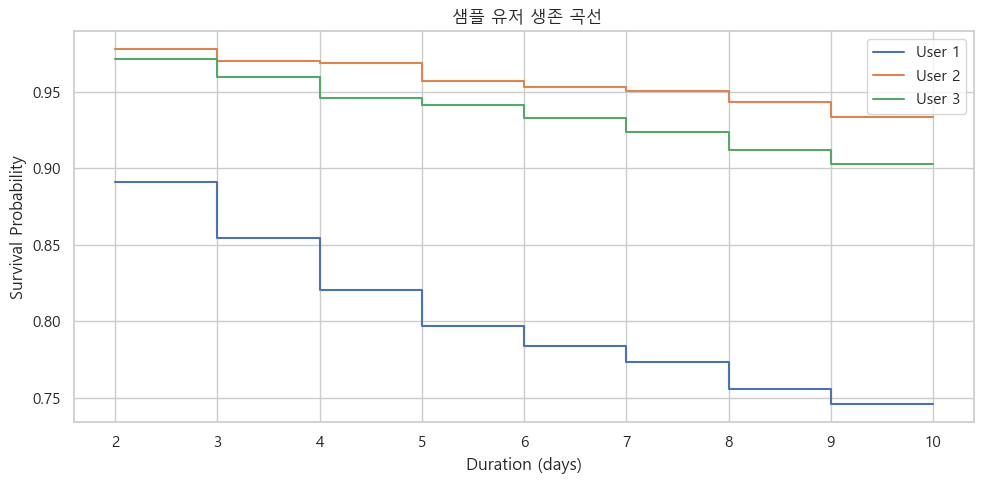

In [18]:
plt.figure(figsize=(10, 5))
# ÏÉùÏ°¥ Í≥°ÏÑ† ÏòàÏãú (3Î™Ö)
for i in range(3):
    surv_fn = rsf.predict_survival_function(X_test.iloc[[i]])[0]
    times = surv_fn.x  # ÏãúÍ∞ÑÏ∂ï
    probs = surv_fn.y  # ÏÉùÏ°¥ÌôïÎ•†
    plt.step(times, probs, where="post", label=f"User {i+1}")

plt.title(" ÏÉòÌîå Ïú†Ï†Ä ÏÉùÏ°¥ Í≥°ÏÑ†")
plt.xlabel("Duration (days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

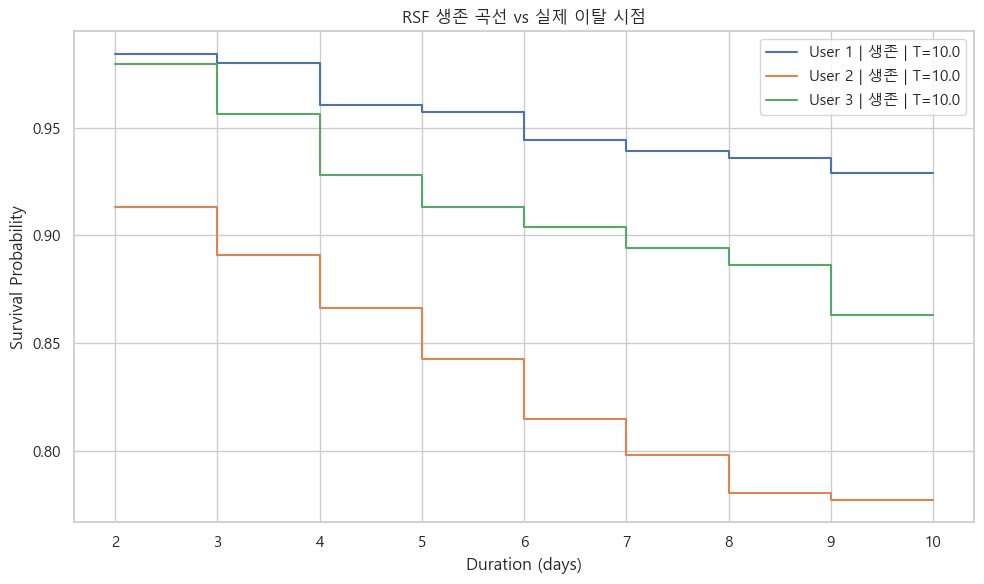

In [19]:
# X_test, y_testÏóêÏÑú ÏùºÎ∂Ä Ïú†Ï†Ä ÏÑ†ÌÉù (event=1 ÎòêÎäî Ï†ÑÏ≤¥ Ï§ë)
n = 3
sample_idx = np.random.choice(len(X_test), size=n, replace=False)

plt.figure(figsize=(10, 6))

for i, idx in enumerate(sample_idx):
    surv_fn = rsf.predict_survival_function(X_test.iloc[[idx]])[0]
    times = surv_fn.x
    probs = surv_fn.y

    # Ïã§Ï†ú Ïù¥ÌÉà Ïó¨Î∂Ä Î∞è Í∏∞Í∞Ñ
    actual_event = y_test["event"][idx]
    actual_duration = y_test["duration"][idx]

    label = f"User {i+1} | {'Ïù¥ÌÉà' if actual_event else 'ÏÉùÏ°¥'} | T={actual_duration}"
    plt.step(times, probs, where="post", label=label)

    # Ïã§Ï†ú Ïù¥ÌÉà ÏãúÏ†ê ÌëúÏãú
    if actual_event:
        plt.axvline(actual_duration, color=f'C{i}', linestyle='--', alpha=0.6)

plt.title("RSF ÏÉùÏ°¥ Í≥°ÏÑ† vs Ïã§Ï†ú Ïù¥ÌÉà ÏãúÏ†ê")
plt.xlabel("Duration (days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
from sksurv.metrics import integrated_brier_score
from sksurv.metrics import integrated_brier_score
#Brier Score	ÏãúÍ∞ÑÎ≥Ñ ÏòàÏ∏° ÏÉùÏ°¥ÌôïÎ•†Ïùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
# 1. ÏãúÍ∞ÑÏ∂ï ÏÑ§Ï†ï (Ï§ëÎèÑÏ†àÎã® Î≤îÏúÑ ÎÇ¥ÏóêÏÑúÎßå)
time_points = np.linspace(2, y_test["duration"].max() - 0.1, 100)

# 2. ÏÉùÏ°¥ Ìï®Ïàò ÏòàÏ∏° (ÌôïÎ•†Í∞í Ï∂îÏ∂ú)
surv_funcs = rsf.predict_survival_function(X_test)

# 3. ÏÉùÏ°¥ ÌôïÎ•†ÏùÑ 2D arrayÎ°ú Î≥ÄÌôò: (n_samples x n_timepoints)
pred_probs = np.asarray([[fn(t) for t in time_points] for fn in surv_funcs])

# 4. Integrated Brier Score Í≥ÑÏÇ∞
ibs = integrated_brier_score(y_train, y_test, pred_probs, time_points)
print(f"üìâ Integrated Brier Score (IBS): {ibs:.4f}")


üìâ Integrated Brier Score (IBS): 0.0591


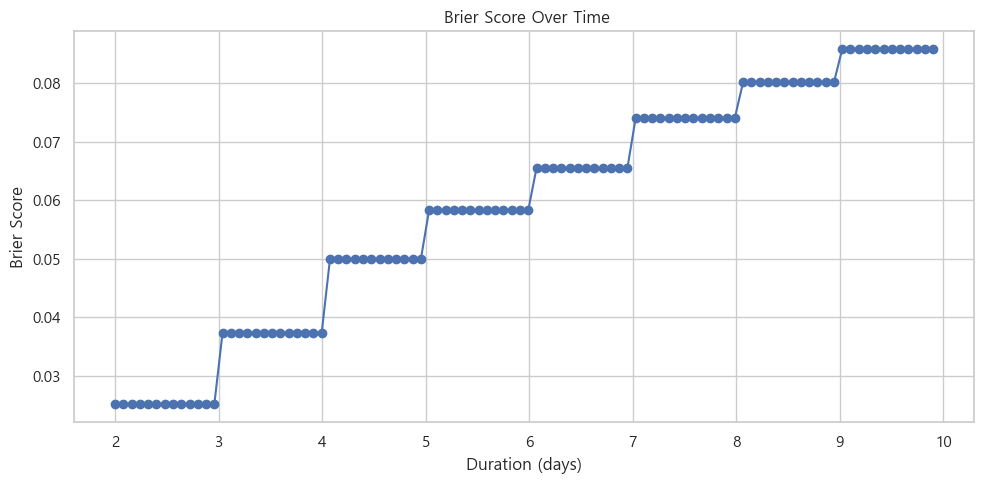

In [28]:
# 13. Brier Score over time ÏãúÍ∞ÅÌôî
from sksurv.metrics import brier_score

# ÏãúÍ∞Ñ Ìè¨Ïù∏Ìä∏ ÏÑ§Ï†ï
time_points = np.linspace(2, y_test["duration"].max() - 0.1, 100)

# ÏÉùÏ°¥ ÌôïÎ•† ÏòàÏ∏°
surv_funcs = rsf.predict_survival_function(X_test)
pred_probs = np.asarray([[fn(t) for t in time_points] for fn in surv_funcs])

# Brier Score Í≥ÑÏÇ∞
_, bs_scores = brier_score(y_train, y_test, pred_probs, time_points)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(time_points, bs_scores, marker="o")
plt.title(" Brier Score Over Time")
plt.xlabel("Duration (days)")
plt.ylabel("Brier Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Í≥†Ï†ïÏä§ÎÉÖÏÉ∑(10Ïõî17Ïùº).csv", low_memory=False)

# 2. Unnamed index Ï†úÍ±∞
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# 3. 6Ï∞® Ï†ÑÏßÅ Ïù¥ÏÉÅ ÌïÑÌÑ∞ÎßÅ
df = df[df["character_class_level"] >= 6].copy()

# 4. ÏàòÏπòÌòï Ïª¨Îüº Î≥ÄÌôò
num_cols = ["character_level", "character_exp", "popularity", "authentic_sum", 
            "dojang_best_floor", "duration"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 5. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df = df.dropna(subset=num_cols + ["event"])

# 6. duration > 0 ÌïÑÌÑ∞ÎßÅ
df = df[df["duration"] > 0]

# 7. Ï∫êÎ¶≠ÌÑ∞ ÏÉùÏÑ±Ïùº Ï≤òÎ¶¨
df["character_date_create"] = pd.to_datetime(df["character_date_create"], errors="coerce")
df = df.dropna(subset=["character_date_create"])

# 7. Ï∫êÎ¶≠ÌÑ∞ ÏÉùÏÑ±Ïùº Ï≤òÎ¶¨ (ÏãúÍ∞ÑÎåÄ Ï†úÍ±∞ Ìè¨Ìï®)
df["character_date_create"] = pd.to_datetime(df["character_date_create"], errors="coerce").dt.tz_localize(None)
df = df.dropna(subset=["character_date_create"])

# 8. Í∏∞Ï§ÄÏùº ÎåÄÎπÑ Ï∫êÎ¶≠ÌÑ∞ ÎÇòÏù¥ Í≥ÑÏÇ∞
reference_date = pd.to_datetime("2024-10-17")
df["create_age_days"] = (reference_date - df["character_date_create"]).dt.days

# 9. Í∏∏Îìú Ïú†Î¨¥ ÌååÏÉù Î≥ÄÏàò
df["guild_flag"] = (df["character_guild_name"] != "ÎØ∏Í∞ÄÏûÖ").astype(int)

# 10. Î≤îÏ£ºÌòï Î≥ÄÏàò Ïõê-Ìï´ Ïù∏ÏΩîÎî©
df_encoded = pd.get_dummies(df[["character_class", "world_name"]], drop_first=True)

# 11. ÌîºÏ≤ò Ï†ïÏùò (ÏÉùÏÑ±Ïùº Ìè¨Ìï®)
features = [
    "character_level", "character_exp", "popularity", "authentic_sum",
    "liberation_quest_clear_flag", "dojang_best_floor", "guild_flag",
    "create_age_days"
]

# 12. X, y Íµ¨ÏÑ±
X = pd.concat([df[features], df_encoded], axis=1)
y = Surv.from_dataframe("event", "duration", df)

# 13. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 14. RSF Î™®Îç∏ ÌïôÏäµ
rsf = RandomSurvivalForest(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rsf.fit(X_train, y_train)

# 15. Concordance Index Ï∂úÎ†•
cindex = concordance_index_censored(
    y_test["event"], y_test["duration"], rsf.predict(X_test)
)[0]
print(f"‚úÖ Concordance Index (C-index): {cindex:.4f}")


‚úÖ Concordance Index (C-index): 0.6980


In [2]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Permutation Importance
result = permutation_importance(
    rsf, X_test, y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Í≤∞Í≥º Ï†ïÎ¶¨
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

print(importance_df)


               feature  importance_mean  importance_std
0      character_level         0.074733        0.002207
3        authentic_sum         0.041898        0.001773
6           guild_flag         0.030431        0.001273
7      create_age_days         0.027521        0.001273
5    dojang_best_floor         0.012014        0.001075
..                 ...              ...             ...
62      world_name_Ï†úÎãàÏä§        -0.000180        0.000083
45  character_class_Ï∫°Ìã¥        -0.000216        0.000023
55       world_name_Î≤†Îùº        -0.000307        0.000203
56     world_name_Ïä§Ïπ¥ÎãàÏïÑ        -0.000632        0.000284
54       world_name_Î£®ÎÇò        -0.000729        0.000149

[64 rows x 3 columns]


<Axes: >

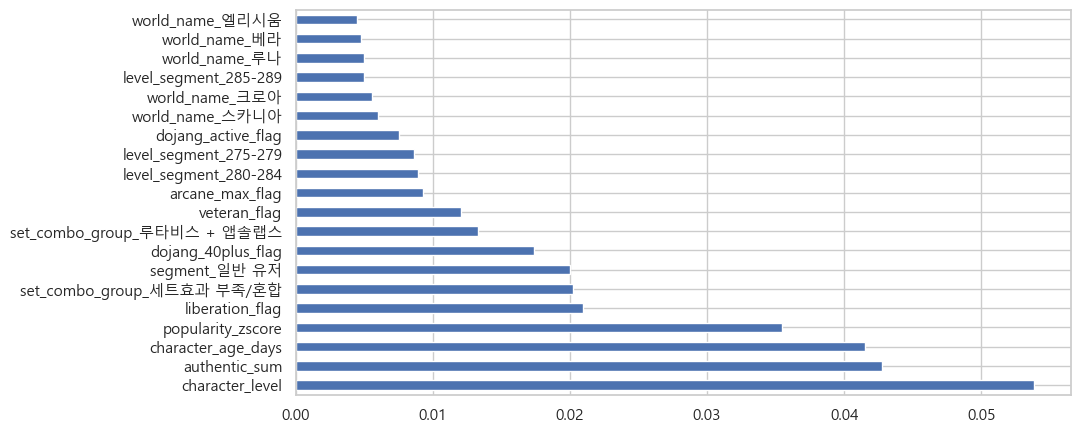

In [163]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, X, y,
    n_repeats=5,
    random_state=42,
    n_jobs=1  # ‚Üê Î≥ëÎ†¨Ï≤òÎ¶¨ Ïïà Ïì∞Í≥† ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÎèåÎ¶º
)

importances = pd.Series(result.importances_mean, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh')


In [8]:
#  ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib

#  Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (Ï†ÑÏ≤¥ ÏÇ¨Ïö©)
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)
df["popularity_zscore"] = df["popularity_zscore"].fillna(0)
#Í∏∏Îìú Ïú†Î¨¥ ÌååÏÉù Î≥ÄÏàò
df["guild_flag"] = (df["character_guild_name"] != "ÎØ∏Í∞ÄÏûÖ").astype(int)
#  ÏàòÏπòÌòï ÏïàÏ†ïÌôî
numeric_cols = ["character_level", "authentic_sum", "popularity_zscore", "character_age_days"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

#  Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏõêÌï´ Ïù∏ÏΩîÎî©
categorical_cols = ["segment", "level_segment", "set_combo_group", "character_class", "world_name"]
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)


#  ÏµúÏ¢Ö ÌîºÏ≤òÏÖã
X = pd.concat([
    df[[
        "character_level","authentic_sum", "popularity_zscore", "character_age_days",
        "new_user_flag", "veteran_flag", "liberation_flag", "arcane_max_flag",
        "dojang_active_flag", "dojang_40plus_flag","guild_flag"
    ]],
    df_encoded
], axis=1)

#  ÌÉÄÍ≤ü ÏÉùÏÑ±
y = Surv.from_dataframe("event", "duration", df)

#  ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  RSF Î™®Îç∏ ÌïôÏäµ
rsf = RandomSurvivalForest(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rsf.fit(X_train, y_train)

#  ÌèâÍ∞Ä - C-index
cindex = concordance_index_censored(y_test["event"], y_test["duration"], rsf.predict(X_test))[0]
print(f" Concordance Index (C-index): {cindex:.4f}")

#  Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• (Ïª§ÎÑê Ïû¨ÏãúÏûë ÎåÄÎπÑ)
import pickle

joblib.dump(rsf, "rsf_model.pkl")
X_train.to_pickle("X_train.pkl")
X_test.to_pickle("X_test.pkl")
with open("y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)
with open("y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)


 Concordance Index (C-index): 0.7110


In [210]:
from sklearn.metrics import classification_report
import numpy as np

# Ïòà: 6Ï£ºÏ∞® Í∏∞Ï§Ä ÏÉùÏ°¥ÌôïÎ•† Ï∂îÏ∂ú
surv_funcs = rsf.predict_survival_function(X_test)
s6 = np.array([fn(6) for fn in surv_funcs])

# 6Ï£ºÏ∞® ÏÉùÏ°¥ÌôïÎ•† Í∏∞Ï§Ä 0.85 Ïù¥Ìïò ‚Üí Ïù¥ÌÉà ÏòàÏ∏°
y_pred = (s6 < 0.85).astype(int)
y_true = y_test["event"].astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.91      0.94      0.92     37587
           1       0.26      0.21      0.23      4176

    accuracy                           0.86     41763
   macro avg       0.59      0.57      0.58     41763
weighted avg       0.85      0.86      0.86     41763



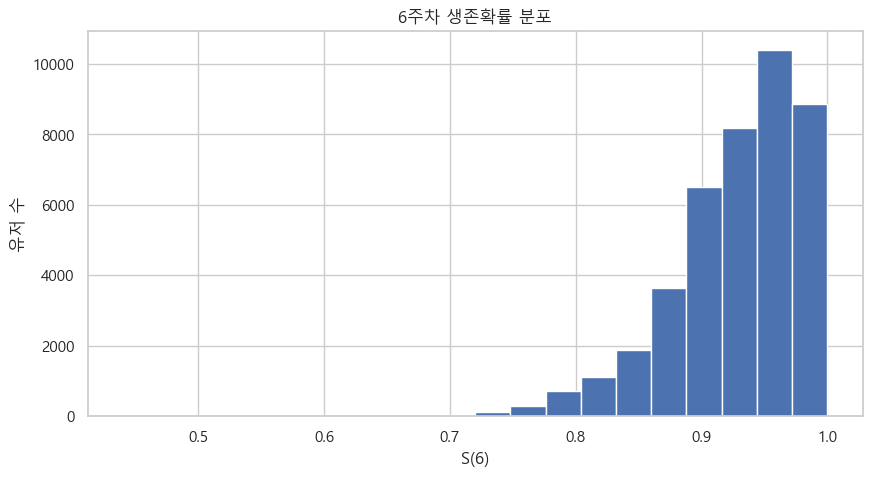

In [170]:
import matplotlib.pyplot as plt
plt.hist(s6, bins=20)
plt.title("6Ï£ºÏ∞® ÏÉùÏ°¥ÌôïÎ•† Î∂ÑÌè¨")
plt.xlabel("S(6)")
plt.ylabel("Ïú†Ï†Ä Ïàò")
plt.show()


In [175]:
# ‚úÖ Ï†ÑÏ≤¥ Î∂ÑÎ•ò Î™®Îç∏ ÏÑ§Í≥Ñ Î∞è Ï†ÄÏû• ÏΩîÎìú (RandomForestClassifier Í∏∞Î∞ò)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# üìå 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)
df["popularity_zscore"] = df["popularity_zscore"].fillna(0)

# üìå 2. ÏàòÏπòÌòï ÏïàÏ†ïÌôî
numeric_cols = ["character_level", "authentic_sum", "popularity_zscore", "character_age_days"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# üìå 3. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî©
categorical_cols = ["segment", "level_segment", "set_combo_group", "character_class", "world_name"]
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# üìå 4. ÌîºÏ≤òÏÖã Íµ¨ÏÑ± (duration, event Ï†úÍ±∞)
X = pd.concat([
    df[[
        "character_level", "authentic_sum", "popularity_zscore", "character_age_days",
        "new_user_flag", "veteran_flag", "liberation_flag", "arcane_max_flag",
        "dojang_active_flag", "dojang_40plus_flag"
    ]],
    df_encoded
], axis=1)

y = df["event"]  # ÌÉÄÍ≤ü: Ïù¥ÌÉà Ïó¨Î∂Ä

# üìå 5. ÌïôÏäµ/Í≤ÄÏ¶ù Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# üìå 6. Î™®Îç∏ ÌïôÏäµ
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
clf.fit(X_train, y_train)

# üìå 7. ÌèâÍ∞Ä
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

classification_report_text = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# üìå 8. Ï†ÄÏû•
joblib.dump(clf, "rf_classifier_model.pkl")
X_train.to_pickle("X_train_cls.pkl")
X_test.to_pickle("X_test_cls.pkl")
y_train.to_pickle("y_train_cls.pkl")
y_test.to_pickle("y_test_cls.pkl")

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.90      0.82      0.86     37587
           1       0.10      0.18      0.13      4176

    accuracy                           0.76     41763
   macro avg       0.50      0.50      0.49     41763
weighted avg       0.82      0.76      0.79     41763



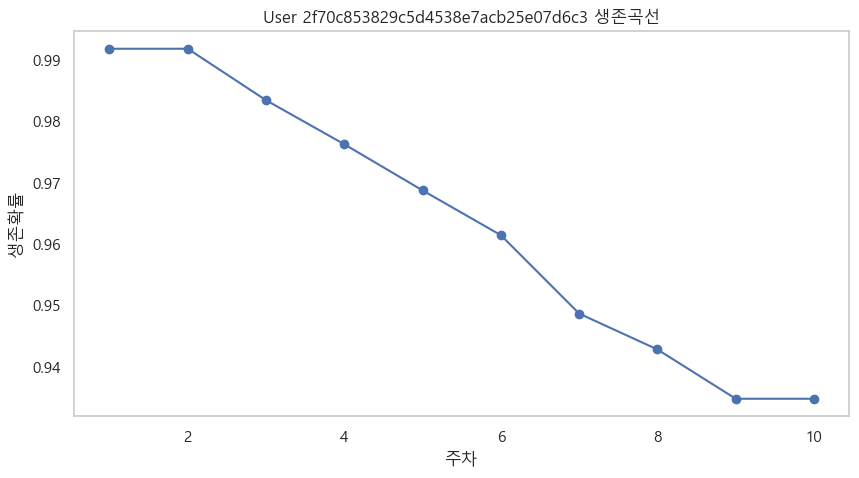

In [176]:
import matplotlib.pyplot as plt

# ocidÎ°ú Ïú†Ï†Ä Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
target_ocid = "2f70c853829c5d4538e7acb25e07d6c3"
target_index = df[df["ocid"] == target_ocid].index[0]

# Ìï¥Îãπ Ïú†Ï†Ä row ‚Üí X Ìè¨Îß∑ÏúºÎ°ú Ï∂îÏ∂ú
X_target = X.loc[[target_index]]

# ÏÉùÏ°¥Ìï®Ïàò ÏñªÍ∏∞
surv_fn = rsf.predict_survival_function(X_target)[0]

# ÏÉùÏ°¥Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞ (1~10Ï£ºÏ∞® ÏòàÏãú)
weeks = list(range(1, 11))
probs = [surv_fn(w) for w in weeks]

plt.plot(weeks, probs, marker="o")
plt.title(f"User {target_ocid} ÏÉùÏ°¥Í≥°ÏÑ†")
plt.xlabel("Ï£ºÏ∞®")
plt.ylabel("ÏÉùÏ°¥ÌôïÎ•†")
plt.grid()
plt.show()


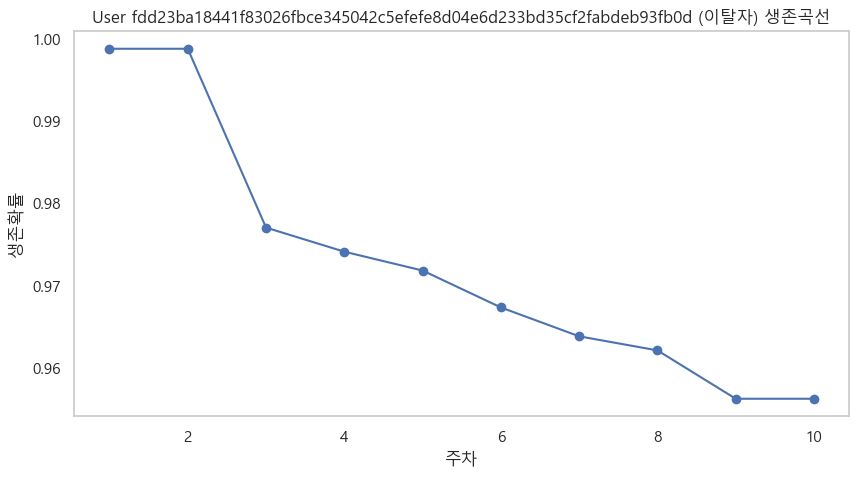

In [177]:
# event == 1 (Ïù¥ÌÉàÏûê)Ïù∏ Ïú†Ï†ÄÎßå ÌïÑÌÑ∞
df_event_1 = df[df["event"] == 1]

# ÏïÑÎ¨¥ Ïú†Ï†Ä ÌïòÎÇò ocid ÌôïÏù∏
sample_ocid = df_event_1.iloc[0]["ocid"]

# Ìï¥Îãπ ocidÏóê ÎåÄÌï¥ ÏÉùÏ°¥Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
idx = df[df["ocid"] == sample_ocid].index[0]
X_target = X.loc[[idx]]
surv_fn = rsf.predict_survival_function(X_target)[0]

weeks = list(range(1, 11))
probs = [surv_fn(w) for w in weeks]

plt.plot(weeks, probs, marker="o")
plt.title(f"User {sample_ocid} (Ïù¥ÌÉàÏûê) ÏÉùÏ°¥Í≥°ÏÑ†")
plt.xlabel("Ï£ºÏ∞®")
plt.ylabel("ÏÉùÏ°¥ÌôïÎ•†")
plt.grid()
plt.show()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sksurv.ensemble import RandomSurvivalForest

# ‚úÖ Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎî©
rsf = joblib.load("rsf_model.pkl")
X = pd.read_pickle("X_train.pkl")  # Î≥ëÌï©Îêú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)

# ‚úÖ ÏÉùÏ°¥Ìï®Ïàò Í≥ÑÏÇ∞
surv_fns = rsf.predict_survival_function(X)

# ‚úÖ Ï£ºÏ∞®Î≥Ñ ÏÉùÏ°¥ÌôïÎ•†ÏùÑ ÌñâÎ†¨Î°ú Ï∂îÏ∂ú (1~10Ï£ºÏ∞®)
weeks = np.arange(1, 11)
surv_probs_matrix = np.array([[fn(w) for w in weeks] for fn in surv_fns])

# ‚úÖ event Ïª¨Îüº Î≥ëÌï©
X["event"] = df.loc[X.index, "event"].values

# ‚úÖ ÌèâÍ∑† ÏÉùÏ°¥ÌôïÎ•† Í≥ÑÏÇ∞
mean_surv_0 = surv_probs_matrix[X["event"] == 0].mean(axis=0)
mean_surv_1 = surv_probs_matrix[X["event"] == 1].mean(axis=0)

# ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(weeks, mean_surv_0, label="ÎπÑÏù¥ÌÉàÏûê ÌèâÍ∑†", marker="o")
plt.plot(weeks, mean_surv_1, label="Ïù¥ÌÉàÏûê ÌèâÍ∑†", marker="o")
plt.title("Ïù¥ÌÉàÏûê vs ÎπÑÏù¥ÌÉàÏûê ÌèâÍ∑† ÏÉùÏ°¥Í≥°ÏÑ†")
plt.xlabel("Ï£ºÏ∞®")
plt.ylabel("ÏÉùÏ°¥ÌôïÎ•†")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'sklearn.ensemble._gb_losses'

In [188]:
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df2 = pd.read_csv("time_varying_with_all_changes.csv", low_memory=False)
# 2. ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Í∏∞Ï§ÄÏùº ÏÑ§Ï†ï
df2["start_date"] = pd.to_datetime(df2["start_date"])
df2["stop_date"] = pd.to_datetime(df2["stop_date"])
start_point = df2["start_date"].min()
df2["start"] = (df2["start_date"] - start_point).dt.days
df2["stop"] = (df2["stop_date"] - start_point).dt.days

# 3. Ï£ºÏ∞® ÏÉùÏÑ± (Ï†ïÏÉÅ Ï£ºÏ∞® ÌùêÎ¶Ñ ÌååÏïÖÏö©)
df2["week"] = ((df2["start_date"] - start_point).dt.days // 7) + 1
df2 = df2[df2["week"] <= 9]
# ocid Í∏∞Ï§ÄÏúºÎ°ú Ïú†Ï†Ä 5Î™Ö ÏÉòÌîåÎßÅ
sampled_ocids = df2["ocid"].dropna().unique()[:5]  # ÎòêÎäî .sample(n=5, random_state=42)

# ÏÉòÌîåÎßÅÌïú Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
df_sampled = df2[df2["ocid"].isin(sampled_ocids)].sort_values(["ocid", "week"])

# Ï†ÄÏû•Ìï¥ÏÑú ChatGPTÏóê Ïò¨Î¶¨Í∏∞
df_sampled.to_csv("ÏÉòÌîå_Ïú†Ï†Ä_time_varying.csv", index=False)


In [ ]:
# ÎÇ†Ïßú Ï≤òÎ¶¨
df2["character_date_create"] = pd.to_datetime(df2["character_date_create"], errors="coerce")
df2["character_date_create"] = df2["character_date_create"].dt.tz_localize(None)
reference_date = pd.to_datetime("2024-10-17")
df2["character_age_days"] = (reference_date - df2["character_date_create"]).dt.days

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df2 = pd.read_csv("time_varying_with_all_changes.csv", low_memory=False)
# 2. ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Í∏∞Ï§ÄÏùº ÏÑ§Ï†ï
df2["start_date"] = pd.to_datetime(df2["start_date"])
df2["stop_date"] = pd.to_datetime(df2["stop_date"])
start_point = df2["start_date"].min()
df2["start"] = (df2["start_date"] - start_point).dt.days
df2["stop"] = (df2["stop_date"] - start_point).dt.days

# 3. Ï£ºÏ∞® ÏÉùÏÑ± (Ï†ïÏÉÅ Ï£ºÏ∞® ÌùêÎ¶Ñ ÌååÏïÖÏö©)
df2["week"] = ((df2["start_date"] - start_point).dt.days // 7) + 1
df2 = df2[df2["week"] <= 9]

# ÎÇ†Ïßú Ï≤òÎ¶¨
df2["character_date_create"] = pd.to_datetime(df2["character_date_create"], errors="coerce")
df2["character_date_create"] = df2["character_date_create"].dt.tz_localize(None)
reference_date = pd.to_datetime("2024-10-17")
df2["character_age_days"] = (reference_date - df2["character_date_create"]).dt.days
# Ïú†Ï†ÄÎ≥Ñ Ï£ºÏ∞® Ï†ïÎ†¨
df2 = df2.sort_values(by=["ocid", "week"])

# üîÑ Î≥ÄÌôîÎüâ ÏßÅÏ†ë Í≥ÑÏÇ∞
df2["guild_flag_change"] = df2.groupby("ocid")["guild_flag"].diff().fillna(0)
df2["liberation_flag_change"] = df2.groupby("ocid")["liberation_flag"].diff().fillna(0)

#  ÏãúÍ≥ÑÏó¥ ÌîºÏ≤ò ÏµúÏ¢Ö ÌôïÏ†ï
time_cols = [
    "guild_flag_change", 
    "liberation_flag_change", 
    "authentic_sum_change", 
    "popularity_change"
]

#  Ï†ïÏ†Å ÌîºÏ≤ò ÏµúÏ¢Ö ÌôïÏ†ï
static_cols = [
    "character_class", 
    "world_name", 
    "character_age_days"
]

# Ï†ïÏ†Å ÌîºÏ≤ò Ïù∏ÏΩîÎî© (ÏßÅÏóÖ, ÏÑúÎ≤Ñ ‚Üí ÏõêÌï´)
df_static = df2.drop_duplicates("ocid")[["ocid"] + static_cols].copy()
df_static = pd.get_dummies(df_static, columns=["character_class", "world_name"], drop_first=True)

# ÌÉÄÍ≤ü Íµ¨ÏÑ±
df_target = df2.drop_duplicates("ocid")[["ocid", "stop", "event"]].copy()
df_meta = pd.merge(df_static, df_target, on="ocid")

# ÏãúÍ≥ÑÏó¥ Î∞è Ï†ïÏ†Å ÌîºÏ≤ò, ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X_time, X_static, y_duration, y_event = [], [], [], []

for ocid, group in df2.groupby("ocid"):
    group = group.sort_values("week")

    sequence = group[time_cols].values
    sequence_padded = pad_sequences([sequence], maxlen=10, padding="post", dtype="float32")[0]

    if ocid not in df_meta["ocid"].values:
        continue

    static_values = df_meta[df_meta["ocid"] == ocid].drop(columns=["ocid", "stop", "event"]).values[0]
    duration = df_meta[df_meta["ocid"] == ocid]["stop"].values[0]
    event = df_meta[df_meta["ocid"] == ocid]["event"].values[0]

    X_time.append(sequence_padded)
    X_static.append(static_values)
    y_duration.append(duration)
    y_event.append(event)

# numpy Î≥ÄÌôò
X_time = np.array(X_time)
X_static = np.array(X_static)
y_duration = np.array(y_duration)
y_event = np.array(y_event)

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

# ÏãúÍ≥ÑÏó¥ ÏûÖÎ†• (10Ï£º √ó 4ÌîºÏ≤ò)
input_seq = Input(shape=(10, 4), name="time_input")
x = Masking(mask_value=0.)(input_seq)
x = LSTM(64, return_sequences=False)(x)

# Ï†ïÏ†Å ÏûÖÎ†• (ÏßÅÏóÖ/ÏõîÎìú/Í≤ΩÍ≥ºÏùº Îì±)
input_static = Input(shape=(X_static.shape[1],), name="static_input")
s = Dense(32, activation="relu")(input_static)

# Î≥ëÌï©
merged = Concatenate()([x, s])
merged = Dense(32, activation="relu")(merged)
output = Dense(1, activation="sigmoid", name="surv_prob")(merged)  # ÏÉùÏ°¥ÌôïÎ•† (Ïù¥ÌÉà ÌôïÎ•†Ïùò Î∞òÎåÄ)

# Î™®Îç∏ Ï†ïÏùò
model = Model(inputs=[input_seq, input_static], outputs=output)

# Ïª¥ÌååÏùº (Ïö∞ÏÑ† binary_crossentropyÎ°ú Îã®Ïàú Ïù¥ÌÉà Î∂ÑÎ•ò Î™©Ï†Å)
model.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
model.fit(
    x=[X_time, X_static],
    y=1 - y_event,  # ÏÉùÏ°¥ ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ event=0Ïù¥ ÏñëÏÑ±
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


In [ ]:
# ÏÉùÏ°¥ ÌôïÎ•† ÏòàÏ∏°
y_pred_survprob = model.predict([X_time, X_static])

# Ïù¥ÌÉà ÌôïÎ•† = 1 - ÏÉùÏ°¥ÌôïÎ•†
y_pred_churnprob = 1 - y_pred_survprob


In [3]:
import joblib
import pickle
import pandas as pd

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
rsf = joblib.load("rsf_model.pkl")

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_train = pd.read_pickle("X_train.pkl")
X_test = pd.read_pickle("X_test.pkl")

with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)


In [3]:
from sksurv.metrics import concordance_index_censored

# RSF ÏòàÏ∏° ÏúÑÌóòÎèÑ (ÎÇÆÏùÑÏàòÎ°ù ÏÉùÏ°¥ ÌôïÎ•† ÎÜíÏùå)
risk_scores = rsf.predict(X_test)

# C-index Í≥ÑÏÇ∞
cindex = concordance_index_censored(
    y_test["event"], y_test["duration"], risk_scores
)[0]

print(f"üìä Concordance Index (C-index): {cindex:.4f}")


üìä Concordance Index (C-index): 0.7110


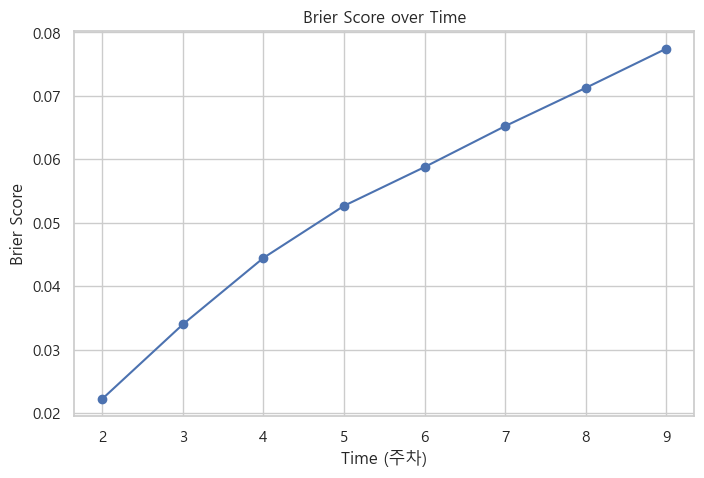

In [4]:
from sksurv.metrics import brier_score
import numpy as np
import matplotlib.pyplot as plt

# ÌèâÍ∞Ä ÏãúÍ∞Ñ ÏãúÏ†ê (y_test duration Î≤îÏúÑ ÎÇ¥ÏóêÏÑú ÏÑ§Ï†ï)
times = np.arange(2, 10)

# ÏÉùÏ°¥ Ìï®Ïàò ÏòàÏ∏°
surv_funcs = rsf.predict_survival_function(X_test)
surv_preds_array = np.asarray([[fn(t) for t in times] for fn in surv_funcs])

# Brier Score Í≥ÑÏÇ∞
score_times, brier_scores = brier_score(y_train, y_test, surv_preds_array, times)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(score_times, brier_scores, marker='o')
plt.title("Brier Score over Time")
plt.xlabel("Time (Ï£ºÏ∞®)")
plt.ylabel("Brier Score")
plt.grid(True)
plt.show()


In [4]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎÇ¥ÏóêÏÑú Í∞ÄÎä•Ìïú ÏãúÍ∞Ñ Î≤îÏúÑ ÏûêÎèô Í≥ÑÏÇ∞
min_time = int(np.floor(np.min([y[1] for y in y_test])))
max_time = int(np.floor(np.max([y[1] for y in y_test])))

# ÏãúÍ∞Ñ Î≤îÏúÑ ÏÑ§Ï†ï: Í¥ÄÏ∏°Îêú duration ÎÇ¥ÏóêÏÑúÎßå ÌèâÍ∞Ä
times = np.arange(min_time, max_time)

# ÏÉùÏ°¥ Ìï®Ïàò ÏòàÏ∏°
surv_funcs = rsf.predict_survival_function(X_test)
preds_array = np.asarray([[fn(t) for t in times] for fn in surv_funcs])

# IBS Í≥ÑÏÇ∞
from sksurv.metrics import integrated_brier_score
ibs = integrated_brier_score(y_train, y_test, preds_array, times)
print(f"üìâ Integrated Brier Score (IBS): {ibs:.4f}")


üìâ Integrated Brier Score (IBS): 0.0579


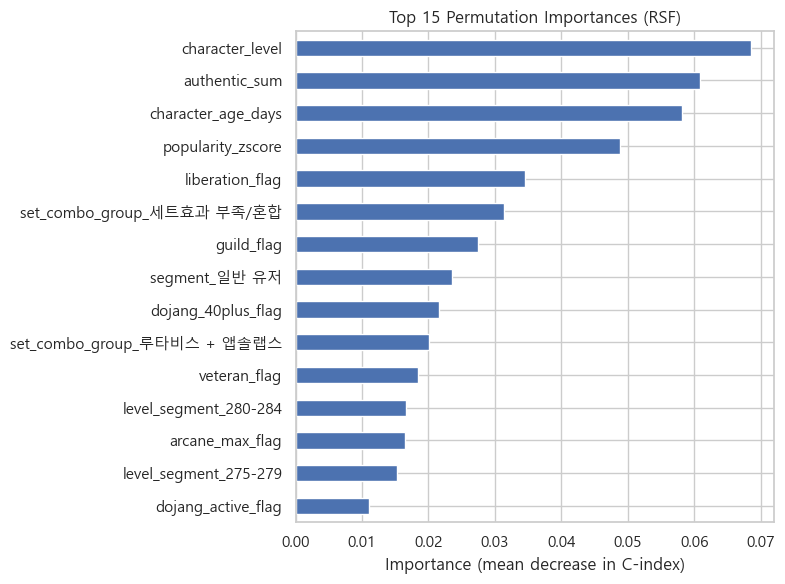

In [5]:
from sklearn.inspection import permutation_importance

# Permutation Importance Í≥ÑÏÇ∞
result = permutation_importance(
    rsf, X_test, y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Ï§ëÏöîÎèÑ Ï∂îÏ∂ú + ÏãúÍ∞ÅÌôî
importances = pd.Series(result.importances_mean, index=X_test.columns)
importances.sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Permutation Importances (RSF)")
plt.xlabel("Importance (mean decrease in C-index)")
plt.tight_layout()
plt.show()


In [9]:
# Ï§ëÏöîÎèÑ Ï∂îÏ∂ú + ÏãúÍ∞ÅÌôî
importances = pd.Series(result.importances_mean, index=X_test.columns)
importances.sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Permutation Importances (RSF)")
plt.xlabel("Importance (mean decrease in C-index)")
plt.tight_layout()
plt.show()

NameError: name 'result' is not defined

In [9]:
top5 = importances.sort_values(ascending=False).head(5)
top5_pct = (top5 / top5.sum() * 100).round(1)
print(top5_pct)


set_combo_group_ÏÑ∏Ìä∏Ìö®Í≥º Î∂ÄÏ°±/ÌòºÌï©    29.0
character_level               28.1
authentic_sum                 23.4
liberation_flag                9.8
character_age_days             9.7
dtype: float64


In [15]:
import joblib
import pickle
import pandas as pd
from sksurv.functions import StepFunction

# Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
rsf = joblib.load("rsf_model.pkl")
X_test = pd.read_pickle("X_test.pkl")

# ÏÉùÏ°¥Ìï®Ïàò ÏòàÏ∏°
surv_funcs = rsf.predict_survival_function(X_test)

# 9Ï£ºÏ∞® ÏÉùÏ°¥ÌôïÎ•† Í≥ÑÏÇ∞
target_week = 9
survival_probs_at_week = []
for fn in surv_funcs:
    idx = (fn.x >= target_week).argmax() if any(fn.x >= target_week) else -1
    survival_probs_at_week.append(fn.y[idx] if idx != -1 else fn.y[-1])


# Í≤∞Í≥º Í≤∞Ìï©
df_result = X_test.copy()
df_result["survival_prob_9w"] = survival_probs_at_week
df_result["risk_score"] = 1 - df_result["survival_prob_9w"]


# ÏÉÅÏúÑ 5Í∞ú ÎØ∏Î¶¨Î≥¥Í∏∞
df_result.head()


character_level  authentic_sum  popularity_zscore  character_age_days  \
76912               281             41          -0.284631                 288   
117772              277             41          -0.032134                2642   
107888              278             32          -0.047745                2308   
189888              271             17          -0.135739                 395   
7143                289             55          -0.193096                1653   

        new_user_flag  veteran_flag  liberation_flag  arcane_max_flag  \
76912               0             0                0                1   
117772              0             1                1                1   
107888              0             1                0                1   
189888              0             0                0                1   
7143                0             0                1                1   

        dojang_active_flag  dojang_40plus_flag  ...  world_name_Ïä§Ïπ¥ÎãàÏïÑ  \
76912                    1                   0  ...             True   
117772                   1                   1  ...            False   
107888                   1                   1  ...            False   
189888                   1                   0  ...            False   
7143                     1                   1  ...            False   

        world_name_ÏïÑÏºÄÏù∏  world_name_ÏóòÎ¶¨ÏãúÏõÄ  world_name_Ïò§Î°úÎùº  world_name_Ïú†ÎãàÏò®  \
76912            False            False           False           False   
117772           False             True           False           False   
107888           False            False           False           False   
189888           False            False           False           False   
7143             False             True           False           False   

        world_name_Ïù¥ÎÖ∏ÏãúÏä§  world_name_Ï†úÎãàÏä§  world_name_ÌÅ¨Î°úÏïÑ  survival_prob_9w  \
76912             False           False           False          0.927645   
117772            False           False           False          0.903249   
107888            False           False           False          0.902440   
189888            False           False           False          0.820083   
7143              False           False           False          0.988102   

        risk_score  
76912     0.072355  
117772    0.096751  
107888    0.097560  
189888    0.179917  
7143      0.011898  

[5 rows x 78 columns]

In [16]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41763 entries, 76912 to 14512
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   character_level                41763 non-null  int64  
 1   authentic_sum                  41763 non-null  int64  
 2   popularity_zscore              41763 non-null  float64
 3   character_age_days             41763 non-null  int64  
 4   new_user_flag                  41763 non-null  int64  
 5   veteran_flag                   41763 non-null  int64  
 6   liberation_flag                41763 non-null  int64  
 7   arcane_max_flag                41763 non-null  int64  
 8   dojang_active_flag             41763 non-null  int64  
 9   dojang_40plus_flag             41763 non-null  int64  
 10  segment_ÏùºÎ∞ò Ïú†Ï†Ä                  41763 non-null  bool   
 11  level_segment_275-279          41763 non-null  bool   
 12  level_segment_280-284          41763 no

In [14]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.functions import StepFunction
import joblib

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)
df["popularity_zscore"] = df["popularity_zscore"].fillna(0)
df["guild_flag"] = (df["character_guild_name"] != "ÎØ∏Í∞ÄÏûÖ").astype(int)
# 3. ÏàòÏπòÌòï ÏïàÏ†ïÌôî
numeric_cols = ["character_level", "authentic_sum", "popularity_zscore", "character_age_days"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏõêÌï´ Ïù∏ÏΩîÎî©
categorical_cols = ["segment", "level_segment", "set_combo_group", "character_class", "world_name"]
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# 5. ÏµúÏ¢Ö ÌîºÏ≤òÏÖã
X = pd.concat([
    df[[
        "character_level", "authentic_sum", "popularity_zscore", "character_age_days",
        "new_user_flag", "veteran_flag", "liberation_flag", "arcane_max_flag",
        "dojang_active_flag", "dojang_40plus_flag","guild_flag"
    ]],
    df_encoded
], axis=1)

# 6. ÌÉÄÍ≤ü ÏÉùÏÑ±
y = Surv.from_dataframe("event", "duration", df)

# 7. RSF Î™®Îç∏ ÌïôÏäµ (Ïù¥ÎØ∏ ÌïôÏäµÎêú Î™®Îç∏ ÏÇ¨Ïö© Í∞ÄÎä•)
rsf = RandomSurvivalForest(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rsf.fit(X, y)

# 8. Ï†ÑÏ≤¥ Ïú†Ï†Ä ÏÉùÏ°¥Ìï®Ïàò ÏòàÏ∏°
surv_funcs = rsf.predict_survival_function(X)
# 9. Î™®Îç∏Í≥º ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
joblib.dump(rsf, "rsf_model.pkl")
X.to_pickle("X_for_streamlit.pkl")

print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: rsf_model.pkl, X_for_streamlit.pkl")


‚úÖ Ï†ÄÏû• ÏôÑÎ£å: rsf_model.pkl, X_for_streamlit.pkl


In [1]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.functions import StepFunction
import joblib

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Î®∏Ïã†Îü¨ÎãùÏö©Í≥†Ï†ïÏä§ÎÉÖÏÉ∑.csv", low_memory=False)
df["popularity_zscore"] = df["popularity_zscore"].fillna(0)
df["guild_flag"] = (df["character_guild_name"] != "ÎØ∏Í∞ÄÏûÖ").astype(int)
# 3. ÏàòÏπòÌòï ÏïàÏ†ïÌôî
numeric_cols = ["character_level", "authentic_sum", "popularity_zscore", "character_age_days"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏõêÌï´ Ïù∏ÏΩîÎî©
categorical_cols = ["segment", "level_segment", "set_combo_group", "character_class", "world_name"]
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# 5. ÏµúÏ¢Ö ÌîºÏ≤òÏÖã
X = pd.concat([
    df[[
        "character_level", "authentic_sum", "popularity_zscore", "character_age_days",
        "new_user_flag", "veteran_flag", "liberation_flag", "arcane_max_flag",
        "dojang_active_flag", "dojang_40plus_flag","guild_flag"
    ]],
    df_encoded
], axis=1)

# 6. ÌÉÄÍ≤ü ÏÉùÏÑ±
y = Surv.from_dataframe("event", "duration", df)

# 7. RSF Î™®Îç∏ ÌïôÏäµ (Ïù¥ÎØ∏ ÌïôÏäµÎêú Î™®Îç∏ ÏÇ¨Ïö© Í∞ÄÎä•)
rsf = RandomSurvivalForest(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rsf.fit(X, y)

# 8. Ï†ÑÏ≤¥ Ïú†Ï†Ä ÏÉùÏ°¥Ìï®Ïàò ÏòàÏ∏°
surv_funcs = rsf.predict_survival_function(X)

# 9. 9Ï£ºÏ∞® ÏÉùÏ°¥ÌôïÎ•† Í≥ÑÏÇ∞
target_week = 9
survival_probs_9w = []
for fn in surv_funcs:
    idx = (fn.x >= target_week).argmax() if any(fn.x >= target_week) else -1
    survival_probs_9w.append(fn.y[idx] if idx != -1 else fn.y[-1])

# 10. ÏúÑÌóò Ï†êÏàò Í≥ÑÏÇ∞
risk_scores = [1 - prob for prob in survival_probs_9w]

# 11. ÏúÑÌóò Îì±Í∏â ÎùºÎ≤®ÎßÅ
def label_risk(score):
    if score >= 0.25:
        return "ÎÜíÏùå"
    elif score >= 0.15:
        return "Ï§ëÍ∞Ñ"
    else:
        return "ÎÇÆÏùå"

risk_levels = [label_risk(score) for score in risk_scores]

# 12. Ï†ÑÏ≤¥ Ïª¨Îüº Ìè¨Ìï® + Í≤∞Í≥º Í≤∞Ìï©
df_result = df.copy()
df_result["survival_prob_9w"] = survival_probs_9w
df_result["risk_score"] = risk_scores
df_result["risk_level"] = risk_levels

# 13. Ï†ÄÏû•
df_result.to_csv("streamlit_full_user_prediction.csv", index=False)
print("‚úÖ Ï†ÑÏ≤¥ Ïú†Ï†Ä ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å ‚Üí streamlit_full_user_prediction.csv")


‚úÖ Ï†ÑÏ≤¥ Ïú†Ï†Ä ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å ‚Üí streamlit_full_user_prediction.csv


In [ ]:
streamlit_full_user_prediction.csv

In [2]:
df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208812 entries, 0 to 208811
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ocid                         208812 non-null  object 
 1   exp_1010                     208812 non-null  object 
 2   ranking                      208812 non-null  object 
 3   character_name               208812 non-null  object 
 4   world_name                   208812 non-null  object 
 5   character_gender             208812 non-null  object 
 6   character_class              208812 non-null  object 
 7   character_class_level        208812 non-null  int64  
 8   character_level              208812 non-null  int64  
 9   character_exp                208812 non-null  float64
 10  character_exp_rate           208812 non-null  object 
 11  character_guild_name         208812 non-null  object 
 12  character_date_create        208812 non-null  object 
 13 

In [4]:
df2 = pd.read_csv("final_character_data_cleaned.csv", low_memory=False)

In [5]:
level_dist = df.groupby("risk_level")["character_level"].describe()

In [6]:
level_dist

count        mean       std    min    25%    50%    75%    max
risk_level                                                                   
ÎÇÆÏùå          168542.0  279.750899  5.303671  270.0  276.0  280.0  284.0  298.0
ÎÜíÏùå            7798.0  272.487048  3.211381  270.0  270.0  271.0  274.0  290.0
Ï§ëÍ∞Ñ           32472.0  273.278147  3.346109  270.0  271.0  272.0  275.0  290.0

In [7]:
from sksurv.functions import StepFunction
import pandas as pd
import joblib

def compute_threshold_time(fn, threshold=0.7):
    for t, s in zip(fn.x, fn.y):
        if s <= threshold:
            return t
    return max(fn.x)  # ÎÅùÍπåÏßÄ threshold Ïïà ÎÇ¥Î†§Í∞ÄÎ©¥ ÏµúÎåÄÍ∞í Î∞òÌôò

# Ï†ÅÏö©
median_times_75 = [compute_threshold_time(fn, threshold=0.75) for fn in surv_funcs]
df["threshold75_time"] = median_times_75


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208797 entries, 0 to 208796
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ocid                         208797 non-null  object 
 1   exp_1010                     208797 non-null  object 
 2   ranking                      208797 non-null  object 
 3   character_name               208797 non-null  object 
 4   world_name                   208797 non-null  object 
 5   character_gender             208797 non-null  object 
 6   character_class              208797 non-null  object 
 7   character_class_level        208797 non-null  int64  
 8   character_level              208797 non-null  int64  
 9   character_exp                208797 non-null  float64
 10  character_exp_rate           208797 non-null  object 
 11  character_guild_name         208797 non-null  object 
 12  character_date_create        208797 non-null  object 
 13 

In [9]:
# df: Í∏∞Ï°¥ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Îã¥Í∏¥ ÎßàÏä§ÌÑ∞ ÌÖåÏù¥Î∏î
# df2: Ï∫êÎ¶≠ÌÑ∞ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Î≥¥Ï°∞ ÌÖåÏù¥Î∏î

df_merged = df.merge(df2[["ocid", "character_image"]], on="ocid", how="left")


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208818 entries, 0 to 208817
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ocid                         208818 non-null  object 
 1   exp_1010                     208818 non-null  object 
 2   ranking                      208818 non-null  object 
 3   character_name               208818 non-null  object 
 4   world_name                   208818 non-null  object 
 5   character_gender             208818 non-null  object 
 6   character_class              208818 non-null  object 
 7   character_class_level        208818 non-null  int64  
 8   character_level              208818 non-null  int64  
 9   character_exp                208818 non-null  float64
 10  character_exp_rate           208818 non-null  object 
 11  character_guild_name         208818 non-null  object 
 12  character_date_create        208818 non-null  object 
 13 

In [11]:
# character_imageÍ∞Ä NaNÏù∏ Ìñâ Ï†úÍ±∞
df_cleaned = df_merged.dropna(subset=["character_image"]).reset_index(drop=True)


In [12]:
print(df_cleaned["character_image"].isna().sum())  # ‚Üí 0Ïù¥Ïñ¥Ïïº Ï†ïÏÉÅ
print(df_cleaned.shape)  # Î™á Ìñâ ÎÇ®ÏïòÎäîÏßÄ ÌôïÏù∏


0
(208722, 67)


In [13]:
df_cleaned.to_csv("streamlit_user_data_with_image.csv", index=False)

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208722 entries, 0 to 208721
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ocid                         208722 non-null  object 
 1   exp_1010                     208722 non-null  object 
 2   ranking                      208722 non-null  object 
 3   character_name               208722 non-null  object 
 4   world_name                   208722 non-null  object 
 5   character_gender             208722 non-null  object 
 6   character_class              208722 non-null  object 
 7   character_class_level        208722 non-null  int64  
 8   character_level              208722 non-null  int64  
 9   character_exp                208722 non-null  float64
 10  character_exp_rate           208722 non-null  object 
 11  character_guild_name         208722 non-null  object 
 12  character_date_create        208722 non-null  object 
 13 

In [41]:
df['level_segment']

0         285-289
1            290+
2         285-289
3         285-289
4            290+
           ...   
208807    285-289
208808    270-274
208809    270-274
208810       290+
208811    275-279
Name: level_segment, Length: 208812, dtype: object

In [15]:
joblib.dump(rsf, "rsf_model.pkl")


['rsf_model.pkl']

In [16]:
X["ocid"] = df["ocid"]  # ocid Î∂ôÏó¨Ï£ºÍ∏∞ (Streamlit info Îß§ÌïëÏö©)
X.to_pickle("X_for_streamlit.pkl")

In [ ]:
import pandas as pd
import joblib
from sklearn.inspection import permutation_importance
from sksurv.metrics import concordance_index_censored

# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
X = pd.read_pickle("X_for_streamlit.pkl")
df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)
rsf = joblib.load("rsf_model.pkl")
# üí° Ïó¨Í∏∞Ïóê Íº≠ Ï∂îÍ∞Ä!
df["event"] = df["event"].astype(bool)
# ÏÇ¨Ïö©Ïûê Ï†ïÏùò scoring Ìï®Ïàò
def rsf_cindex_score(model, X, y):
    preds = model.predict(X)
    return concordance_index_censored(y["event"], y["duration"], preds)[0]

# X, y Ï§ÄÎπÑ
X_input = X.drop(columns=["ocid"])
y_surv = df[["event", "duration"]].loc[X.index]  # index ÎßûÏ∂§!

# Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
result = permutation_importance(
    rsf,
    X_input,
    y_surv,
    n_repeats=5,
    random_state=42,
    n_jobs=-1,
    scoring=rsf_cindex_score
)

# Ï†ÄÏû•
importance_df = pd.DataFrame({
    "feature": X_input.columns,
    "importance": result.importances_mean
}).sort_values(by="importance", ascending=False)

importance_df.to_csv("feature_importance.csv", index=False)
print("üéâ Ï†ÄÏû• ÏôÑÎ£å: feature_importance.csv")




C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


In [3]:
import pandas as pd
import joblib
from sklearn.inspection import permutation_importance
from sksurv.metrics import concordance_index_censored
rsf = joblib.load("rsf_model.pkl")

In [7]:
from sksurv.metrics import concordance_index_censored
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import time
import pandas as pd
import joblib
from sklearn.inspection import permutation_importance
from sksurv.metrics import concordance_index_censored

# ‚úÖ 1. ÌïôÏäµÏóê Ïì¥ ÌîºÏ≤òÏÖã Î∂àÎü¨Ïò§Í∏∞
X = pd.read_pickle("X_for_streamlit.pkl")
if "ocid" in X.columns:
    X = X.drop(columns=["ocid"])
# ‚úÖ 2. ÏòàÏ∏°Îêú ÏÉùÏ°¥ÌôïÎ•†/Ïù¥Î≤§Ìä∏/duration Ìè¨Ìï®Îêú Í≤∞Í≥º Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)

# ‚úÖ 3. ÌïôÏäµÎêú RSF Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
rsf = joblib.load("rsf_model.pkl")

# ‚úÖ 4. event Ïª¨Îüº boolean ÌÉÄÏûÖÏúºÎ°ú Ï∫êÏä§ÌåÖ (ÌïÑÏàò)
df["event"] = df["event"].astype(bool)

# ‚úÖ 5. y ÏÉùÏÑ±
y = df[["event", "duration"]].loc[X.index]

def rsf_cindex_score(model, X, y):
    preds = model.predict(X)
    return concordance_index_censored(y["event"], y["duration"], preds)[0]

# ÏõêÎûò Ïä§ÏΩîÏñ¥
base_score = rsf_cindex_score(rsf, X, y)

# Î≥ÄÏàò Î¶¨Ïä§Ìä∏
features = X.columns.tolist()
importances = []
n_repeats = 5

for i, feature in enumerate(features):
    print(f"üîÅ ÏßÑÌñâ Ï§ë: {i+1}/{len(features)} - Î≥ÄÏàò: {feature}")
    scores = []
    
    for _ in range(n_repeats):
        X_permuted = X.copy()
        X_permuted[feature] = shuffle(X_permuted[feature], random_state=42)
        score = rsf_cindex_score(rsf, X_permuted, y)
        scores.append(base_score - score)

    importances.append({
        "feature": feature,
        "importance_mean": np.mean(scores),
        "importance_std": np.std(scores)
    })

importance_df = pd.DataFrame(importances).sort_values(by="importance_mean", ascending=False)
importance_df.to_csv("rsf_feature_importance_cindex.csv", index=False)
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: rsf_feature_importance_cindex.csv")


C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


üîÅ ÏßÑÌñâ Ï§ë: 1/77 - Î≥ÄÏàò: character_level


C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


üîÅ ÏßÑÌñâ Ï§ë: 2/77 - Î≥ÄÏàò: authentic_sum


C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


KeyboardInterrupt: 

In [9]:
from joblib import Parallel, delayed
from sksurv.metrics import concordance_index_censored
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import joblib

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
X = pd.read_pickle("X_for_streamlit.pkl")
if "ocid" in X.columns:
    X = X.drop(columns=["ocid"])

df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)
rsf = joblib.load("rsf_model.pkl")
df["event"] = df["event"].astype(bool)
y = df[["event", "duration"]].loc[X.index]

# ‚úÖ C-index Í∏∞Î∞ò scoring Ìï®Ïàò
def rsf_cindex_score(model, X, y):
    preds = model.predict(X)
    return concordance_index_censored(y["event"], y["duration"], preds)[0]

# ‚úÖ base score (ÏõêÎûò ÏÑ±Îä•)
base_score = rsf_cindex_score(rsf, X, y)

# ‚úÖ permutation importance Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_importance(feature):
    scores = []
    for _ in range(5):  # Î∞òÎ≥µ ÌöüÏàò ÏÑ§Ï†ï
        X_permuted = X.copy()
        X_permuted[feature] = shuffle(X_permuted[feature], random_state=None)
        score = rsf_cindex_score(rsf, X_permuted, y)
        scores.append(base_score - score)
    return {
        "feature": feature,
        "importance_mean": np.mean(scores),
        "importance_std": np.std(scores)
    }

# ‚úÖ ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
selected_features = X.columns.tolist()  # ÎòêÎäî [:30]Ï≤òÎüº Ï†úÌïú Í∞ÄÎä•

# ‚úÖ Î≥ëÎ†¨ Ï≤òÎ¶¨ Ïã§Ìñâ
results = Parallel(n_jobs=-1)(
    delayed(compute_importance)(feature) for feature in selected_features
)

# ‚úÖ Í≤∞Í≥º Ï†ÄÏû•
importance_df = pd.DataFrame(results).sort_values(by="importance_mean", ascending=False)
importance_df.to_csv("rsf_feature_importance_cindex_parallel.csv", index=False)
print("‚úÖ Î≥ëÎ†¨ Ï≤òÎ¶¨Î°ú Ï†ÄÏû• ÏôÑÎ£å")


C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


‚úÖ Î≥ëÎ†¨ Ï≤òÎ¶¨Î°ú Ï†ÄÏû• ÏôÑÎ£å


In [9]:
preds = rsf.predict(X)
print(np.min(preds), np.max(preds), np.mean(preds), np.std(preds))

0.0007643794958055867 6.245986273402791 0.5525310313959915 0.47689108793861185


In [2]:
from joblib import Parallel, delayed
from sksurv.metrics import concordance_index_censored
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import joblib
# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
X = pd.read_pickle("X_for_streamlit.pkl")
if "ocid" in X.columns:
    X = X.drop(columns=["ocid"])


In [18]:
from sksurv.metrics import concordance_index_censored
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import time
import pandas as pd
import joblib
from sklearn.inspection import permutation_importance
from sksurv.metrics import concordance_index_censored
X = pd.read_pickle("X_for_streamlit.pkl")
if "ocid" in X.columns:
    X = X.drop(columns=["ocid"])

df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)
rsf = joblib.load("rsf_model.pkl")
df["event"] = df["event"].astype(bool)
y = df[["event", "duration"]].loc[X.index]

# ‚úÖ C-index Í∏∞Î∞ò scoring Ìï®Ïàò
def rsf_cindex_score(model, X, y):
    preds = model.predict(X)
    return concordance_index_censored(y["event"], y["duration"], preds)[0]
    # ‚úÖ base score (ÏõêÎûò ÏÑ±Îä•)
base_score = rsf_cindex_score(rsf, X, y)
print(f"Base C-index: {base_score:.4f}")

C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


Base C-index: 0.8184


In [12]:
print((X.index == y.index).all())

NameError: name 'y' is not defined

In [19]:
print("Ïù∏Îç±Ïä§ ÏùºÏπò Ïó¨Î∂Ä:", X.index.equals(y.index))
print("ÏÉòÌîå 5Í∞ú ÎπÑÍµê:\n", pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1).head())


Ïù∏Îç±Ïä§ ÏùºÏπò Ïó¨Î∂Ä: True
ÏÉòÌîå 5Í∞ú ÎπÑÍµê:
    character_level  authentic_sum  popularity_zscore  character_age_days  \
0              289             61           0.077832                1761   
1              291             58           3.054288                2447   
2              289             66           0.040511                2113   
3              289             66           2.456531                3021   
4              290             66           0.296891                 943   

   new_user_flag  veteran_flag  liberation_flag  arcane_max_flag  \
0              0             0                1                1   
1              0             1                1                1   
2              0             1                0                1   
3              0             1                0                1   
4              0             0                1                1   

   dojang_active_flag  dojang_40plus_flag  ...  world_name_Ïä§Ïπ¥ÎãàÏïÑ  \
0       

In [4]:
preds = rsf.predict(X)
print("min:", np.min(preds), "max:", np.max(preds), "std:", np.std(preds))


min: 0.0007643794958055867 max: 6.245986273402789 std: 0.4768910879386119


In [8]:
# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
X = pd.read_pickle("X_for_streamlit.pkl")
if "ocid" in X.columns:
    X = X.drop(columns=["ocid"])

df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)
rsf = joblib.load("rsf_model.pkl")
df["event"] = df["event"].astype(bool)
y = df[["event", "duration"]].loc[X.index]

def rsf_cindex_score(model, X, y):
    preds = model.predict(X)
    preds = (preds - preds.min()) / (preds.max() - preds.min() + 1e-8)
    return concordance_index_censored(y["event"], y["duration"], preds)[0]
base_score = rsf_cindex_score(rsf, X, y)

# ‚úÖ Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò (Ìïú ÌîºÏ≤ò ÌÖåÏä§Ìä∏Ïö©)
def compute_importance(feature):
    scores = []
    for _ in range(5):
        X_permuted = X.copy()
        X_permuted[feature] = shuffle(X_permuted[feature], random_state=None)
        score = rsf_cindex_score(rsf, X_permuted, y)
        scores.append(base_score - score)
    return {
        "feature": feature,
        "importance_mean": np.mean(scores),
        "importance_std": np.std(scores)
    }

# ‚úÖ ÌÖåÏä§Ìä∏: Ï≤´ Î≤àÏß∏ ÌîºÏ≤òÎßå
test_feature = X.columns[0]
result = compute_importance(test_feature)

# ‚úÖ Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Îã®Ïùº ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÌÖåÏä§Ìä∏ Í≤∞Í≥º:")
print(result)


C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con
C:\Users\qhwhr\anaconda3\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


‚úÖ Îã®Ïùº ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÌÖåÏä§Ìä∏ Í≤∞Í≥º:
{'feature': 'character_level', 'importance_mean': 0.0, 'importance_std': 0.0}


In [9]:
from lifelines.utils import concordance_index
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import joblib

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
X = pd.read_pickle("X_for_streamlit.pkl")
if "ocid" in X.columns:
    X = X.drop(columns=["ocid"])

df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)
rsf = joblib.load("rsf_model.pkl")
df["event"] = df["event"].astype(bool)
y = df[["event", "duration"]].loc[X.index]

# ‚úÖ lifelines Í∏∞Î∞ò ÏïàÏ†ïÏ†Å C-index Ìï®Ïàò
def rsf_cindex_score(model, X, y):
    preds = model.predict(X)
    preds = (preds - preds.min()) / (preds.max() - preds.min() + 1e-8)
    return concordance_index(y["duration"], -preds, event_observed=y["event"])

# ‚úÖ base ÏÑ±Îä•
base_score = rsf_cindex_score(rsf, X, y)

# ‚úÖ Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò (Îã®Ïùº ÌîºÏ≤òÏö©)
def compute_importance(feature):
    scores = []
    for _ in range(5):  # Î∞òÎ≥µ ÌöüÏàò Ï°∞Ï†à Í∞ÄÎä•
        X_permuted = X.copy()
        X_permuted[feature] = shuffle(X_permuted[feature], random_state=None)
        score = rsf_cindex_score(rsf, X_permuted, y)
        scores.append(base_score - score)
    return {
        "feature": feature,
        "importance_mean": np.mean(scores),
        "importance_std": np.std(scores)
    }

# ‚úÖ ÌÖåÏä§Ìä∏Ìï† ÌîºÏ≤ò ÏßÄÏ†ï (Ïòà: Ï≤´ Î≤àÏß∏ ÌîºÏ≤ò)
test_feature = X.columns[0]
result = compute_importance(test_feature)

# ‚úÖ Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò ÌõÑ Ï†ÄÏû•
importance_df = pd.DataFrame([result])
importance_df.to_csv("test_single_feature_importance.csv", index=False)
print("‚úÖ Îã®Ïùº ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï†ÄÏû• ÏôÑÎ£å")
print(importance_df)


‚úÖ Îã®Ïùº ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï†ÄÏû• ÏôÑÎ£å
           feature  importance_mean  importance_std
0  character_level              0.0             0.0


In [13]:
# ‚úÖ ÌÖåÏä§Ìä∏Ìï† feature ÌïòÎÇò ÏßÄÏ†ï
test_feature = "authentic_sum"  # ÎòêÎäî X.columns[1] Îì±

# ‚úÖ Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Ïã§Ìñâ
result = compute_importance(test_feature)

# ‚úÖ ÏöîÏïΩ Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Îã®Ïùº ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÌÖåÏä§Ìä∏ Í≤∞Í≥º:")
print(result)


    permuted score: 0.818385, Œî: 0.000000
    permuted score: 0.818385, Œî: 0.000000
    permuted score: 0.818385, Œî: 0.000000
    permuted score: 0.818385, Œî: 0.000000
    permuted score: 0.818385, Œî: 0.000000
‚úÖ Îã®Ïùº ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÌÖåÏä§Ìä∏ Í≤∞Í≥º:
{'feature': 'authentic_sum', 'importance_mean': 0.0, 'importance_std': 0.0}


In [19]:
# 1. ÏõêÎ≥∏ ÏòàÏ∏°
preds_original = rsf.predict(X)

# 2. ÌîºÏ≤ò ÏÖîÌîå
X_permuted = X.copy()
X_permuted["popularity_zscore"] = np.random.permutation(X_permuted["popularity_zscore"].values)

# 3. ÏÖîÌîå ÌõÑ ÏòàÏ∏°
preds_permuted = rsf.predict(X_permuted)

# 4. Ï∞®Ïù¥ ÌôïÏù∏
diff = np.abs(preds_original - preds_permuted)
print("Ï¥ù ÏòàÏ∏° Ï∞®Ïù¥ Ìï©Í≥Ñ:", diff.sum())
print("ÏòàÏ∏°Í∞í Ï∞®Ïù¥ ÌëúÏ§ÄÌé∏Ï∞®:", np.std(diff))
print("Î™®Îì† Í∞íÏù¥ Í∞ôÏùÄÍ∞Ä:", np.allclose(preds_original, preds_permuted))


Ï¥ù ÏòàÏ∏° Ï∞®Ïù¥ Ìï©Í≥Ñ: 13663.167102277239
ÏòàÏ∏°Í∞í Ï∞®Ïù¥ ÌëúÏ§ÄÌé∏Ï∞®: 0.0784281514252137
Î™®Îì† Í∞íÏù¥ Í∞ôÏùÄÍ∞Ä: False


In [22]:
from lifelines.utils import concordance_index
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import joblib
from sklearn.utils import shuffle
from tqdm import tqdm  # ‚úÖ ÏßÑÌñâÎ•† ÌëúÏãúÏö©

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
X = pd.read_pickle("X_for_streamlit.pkl")
if "ocid" in X.columns:
    X = X.drop(columns=["ocid"])

df = pd.read_csv("streamlit_full_user_prediction.csv", low_memory=False)
rsf = joblib.load("rsf_model.pkl")
df["event"] = df["event"].astype(bool)
y = df[["event", "duration"]].loc[X.index]

# ‚úÖ ÏïàÏ†ïÏ†ÅÏù∏ C-index scoring Ìï®Ïàò
def rsf_cindex_score(model, X, y):
    preds = model.predict(X)
    preds = (preds - preds.min()) / (preds.max() - preds.min() + 1e-8)
    return concordance_index(y["duration"], -preds, event_observed=y["event"])

# ‚úÖ base C-index
base_score = rsf_cindex_score(rsf, X, y)
print(f"üìå Base C-index: {base_score:.10f}")

# ‚úÖ Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò (Í∞úÎ≥Ñ ÌîºÏ≤òÏö©)
def compute_importance(feature):
    scores = []
    for _ in range(5):
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature].values)
        score = rsf_cindex_score(rsf, X_permuted, y)
        delta = base_score - score
        scores.append(delta)
    return {
        "feature": feature,
        "importance_mean": np.mean(scores),
        "importance_std": np.std(scores)
    }

# ‚úÖ tqdm Î≥ëÎ†¨ wrapper
def parallel_with_progress(func, iterable, n_jobs=-1):
    results = Parallel(n_jobs=n_jobs)(
        delayed(func)(item) for item in tqdm(iterable, desc="üîÑ Calculating importances")
    )
    return results

# ‚úÖ Î≥ëÎ†¨ Ï≤òÎ¶¨ Ïã§Ìñâ
selected_features = X.columns.tolist()
results = parallel_with_progress(compute_importance, selected_features)

# ‚úÖ Ï†ïÎ†¨ ÌõÑ Ï†ÄÏû•
importance_df = pd.DataFrame(results).sort_values(by="importance_mean", ascending=False)
importance_df.to_csv("rsf_feature_importance_lifelines.csv", index=False)

print("‚úÖ Î≥ëÎ†¨ Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Î∞è CSV Ï†ÄÏû• ÏôÑÎ£å ‚Üí rsf_feature_importance_lifelines.csv")


üìå Base C-index: 0.8183849974


üîÑ Calculating importances: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 77/77 [15:31<00:00, 12.09s/it]


‚úÖ Î≥ëÎ†¨ Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Î∞è CSV Ï†ÄÏû• ÏôÑÎ£å ‚Üí rsf_feature_importance_lifelines.csv


In [9]:
import scipy.stats as stats
corr, pval = stats.pearsonr(X["character_level"], y["duration"])
print(f"üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.4f}, p-value: {pval:.4f}")


üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.1691, p-value: 0.0000


In [10]:
df = pd.read_csv("streamlit_user_data_with_image.csv", low_memory=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208722 entries, 0 to 208721
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ocid                         208722 non-null  object 
 1   exp_1010                     208722 non-null  object 
 2   ranking                      208722 non-null  object 
 3   character_name               208722 non-null  object 
 4   world_name                   208722 non-null  object 
 5   character_gender             208722 non-null  object 
 6   character_class              208722 non-null  object 
 7   character_class_level        208722 non-null  int64  
 8   character_level              208722 non-null  int64  
 9   character_exp                208722 non-null  float64
 10  character_exp_rate           208722 non-null  object 
 11  character_guild_name         208722 non-null  object 
 12  character_date_create        208722 non-null  object 
 13 

In [15]:
X = pd.read_pickle("X_for_streamlit.pkl")
print("guild_flag" in X.columns)
# ÎòêÎäî
print(X.columns.tolist())


True
['character_level', 'authentic_sum', 'popularity_zscore', 'character_age_days', 'new_user_flag', 'veteran_flag', 'liberation_flag', 'arcane_max_flag', 'dojang_active_flag', 'dojang_40plus_flag', 'guild_flag', 'segment_ÏùºÎ∞ò Ïú†Ï†Ä', 'level_segment_275-279', 'level_segment_280-284', 'level_segment_285-289', 'level_segment_290+', 'set_combo_group_Î£®ÌÉÄÎπÑÏä§ + Ïï±ÏÜîÎû©Ïä§', 'set_combo_group_ÏÑ∏Ìä∏Ìö®Í≥º Î∂ÄÏ°±/ÌòºÌï©', 'set_combo_group_ÏóêÌÖåÎ•¥ÎÑ¨ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú', 'set_combo_group_ÏóêÌÖåÎ•¥ÎÑ¨ + Ïï±ÏÜîÎû©Ïä§', 'set_combo_group_ÏóêÌÖåÎ•¥ÎÑ¨ ÌíÄÏÖã', 'character_class_ÎÇòÏù¥Ìä∏ÏõåÏª§', 'character_class_Îã§ÌÅ¨ÎÇòÏù¥Ìä∏', 'character_class_Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥', 'character_class_Îç∞Î™¨Ïñ¥Î≤§Ï†∏', 'character_class_ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî', 'character_class_ÎùºÎùº', 'character_class_Î£®ÎØ∏ÎÑàÏä§', 'character_class_Î©îÎ•¥ÏÑ∏Îç∞Ïä§', 'character_class_Î©îÏπ¥Îãâ', 'character_class_ÎØ∏ÌïòÏùº', 'character_class_Î∞îÏù¥Ìçº', 'character_class_Î∞∞ÌãÄÎ©îÏù¥ÏßÄ', 'character_class_Î≥¥Ïö∞ÎßàÏä§ÌÑ∞', '

In [16]:
print("‚úÖ dfÏóê guild_flag ÏûàÎÇò?", "guild_flag" in df.columns)
print("‚úÖ XÏóê guild_flag ÏûàÎÇò?", "guild_flag" in X.columns)


‚úÖ dfÏóê guild_flag ÏûàÎÇò? True
‚úÖ XÏóê guild_flag ÏûàÎÇò? True


In [17]:
X_with_ocid = X.copy()
X_with_ocid["ocid"] = df["ocid"]  # ‚úÖ ÏãùÎ≥ÑÏûê Ìè¨Ìï®
X_with_ocid.to_pickle("X_for_streamlit.pkl")  # ÎçÆÏñ¥Ïì∞Í∏∞


In [18]:
X = pd.read_pickle("X_for_streamlit.pkl")
print("X Ïª¨Îüº:", X.columns.tolist())

X Ïª¨Îüº: ['character_level', 'authentic_sum', 'popularity_zscore', 'character_age_days', 'new_user_flag', 'veteran_flag', 'liberation_flag', 'arcane_max_flag', 'dojang_active_flag', 'dojang_40plus_flag', 'guild_flag', 'segment_ÏùºÎ∞ò Ïú†Ï†Ä', 'level_segment_275-279', 'level_segment_280-284', 'level_segment_285-289', 'level_segment_290+', 'set_combo_group_Î£®ÌÉÄÎπÑÏä§ + Ïï±ÏÜîÎû©Ïä§', 'set_combo_group_ÏÑ∏Ìä∏Ìö®Í≥º Î∂ÄÏ°±/ÌòºÌï©', 'set_combo_group_ÏóêÌÖåÎ•¥ÎÑ¨ + ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú', 'set_combo_group_ÏóêÌÖåÎ•¥ÎÑ¨ + Ïï±ÏÜîÎû©Ïä§', 'set_combo_group_ÏóêÌÖåÎ•¥ÎÑ¨ ÌíÄÏÖã', 'character_class_ÎÇòÏù¥Ìä∏ÏõåÏª§', 'character_class_Îã§ÌÅ¨ÎÇòÏù¥Ìä∏', 'character_class_Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥', 'character_class_Îç∞Î™¨Ïñ¥Î≤§Ï†∏', 'character_class_ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî', 'character_class_ÎùºÎùº', 'character_class_Î£®ÎØ∏ÎÑàÏä§', 'character_class_Î©îÎ•¥ÏÑ∏Îç∞Ïä§', 'character_class_Î©îÏπ¥Îãâ', 'character_class_ÎØ∏ÌïòÏùº', 'character_class_Î∞îÏù¥Ìçº', 'character_class_Î∞∞ÌãÄÎ©îÏù¥ÏßÄ', 'character_class_Î≥¥Ïö∞ÎßàÏä§ÌÑ